# Predicting Buyer Retention to Evaluate Campaign Effectiveness at Shopee Indonesia


Author : Theofilus Arifin

---

## Introduction


---



**Background**

Here at Shopee Indonesia we run a lot of campaigns every single day. But, which campaigns bring more high-quality buyers? Is it only temporarily attracting new buyers which will churn after the campaigns are over? In this case, you are asked to create a machine learning model to predict whether a new buyer will later become a retained buyer or not according to their behavior in their first two weeks using our platform. Therefore we could assess whether a certain campaign is drawing more retained buyers or not.

**Objective**

Develop a robust predictive model that accurately identifies new buyers likely to be retained, enabling Shopee Indonesia to optimize marketing campaigns by focusing on initiatives that attract high-quality, long-term buyers.

## 1. Load Data


---



In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
%matplotlib inline

import warnings
import math
import scipy.stats as ss
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [46]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [47]:
sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

# Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Evaluation
from bayes_opt import BayesianOptimization
import shap

In [49]:
df = pd.read_csv('./dataset.csv')
df.shape

(222378, 38)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222378 entries, 0 to 222377
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    222378 non-null  int64  
 1   regist_date                222378 non-null  object 
 2   gender                     222378 non-null  object 
 3   age_group                  222378 non-null  object 
 4   region                     222378 non-null  object 
 5   is_rural_or_urban          222378 non-null  object 
 6   is_buyer_14d               222378 non-null  int64  
 7   is_dp_buyer_14d            222378 non-null  int64  
 8   label                      222378 non-null  int64  
 9   new_buyer_initiative       222000 non-null  object 
 10  total_voucher_claim_14d    124471 non-null  float64
 11  total_order_14d            154801 non-null  float64
 12  gmv_14d                    154801 non-null  float64
 13  pdp_views_14d              21

In [51]:
df.head(3)

user_id regist_date  gender age_group       region is_rural_or_urban  \
0  418329478  2021-04-06  Female     19-24  Jabodetabek             RURAL   
1  439733301  2021-05-08  Female     19-24  Jabodetabek             RURAL   
2  434646106  2021-05-01  Female     19-24  Jabodetabek             RURAL   

   is_buyer_14d  is_dp_buyer_14d  label  \
0             0                0      0   
1             0                0      0   
2             0                0      0   

                    new_buyer_initiative  total_voucher_claim_14d  \
0  Serba Seribu - Price Point Collection                      NaN   
1                                 No KSP                      NaN   
2                                    FSV                      NaN   

   total_order_14d  gmv_14d  pdp_views_14d  shop_views_14d  \
0              NaN      NaN         36.000             NaN   
1              NaN      NaN          4.000             NaN   
2              NaN      NaN         77.000             NaN   

   total_login_days_l14d  total_login_sessions_l14d  time_spent_platform_14d  \
0                      3                      5.000                 1325.322   
1                      4                      4.000                 2633.400   
2                      3                      3.000                 3305.075   

   avg_time_per_session_14d  use_shopeepay  use_shopeepaylater  use_cod  \
0                   265.064            NaN                 NaN      NaN   
1                   658.350            NaN                 NaN      NaN   
2                  1101.692            NaN                 NaN      NaN   

   use_va_bt  use_cc_debit  use_instant  use_sameday  use_nextday  \
0        NaN           NaN          NaN          NaN          NaN   
1        NaN           NaN          NaN          NaN          NaN   
2        NaN           NaN          NaN          NaN          NaN   

   use_regular  use_hemat  shop_mall  shop_ss_plus  shop_ss  shop_cb  \
0          NaN        NaN        NaN           NaN      NaN      NaN   
1          NaN        NaN        NaN           NaN      NaN      NaN   
2          NaN        NaN        NaN           NaN      NaN      NaN   

   shop_sbs  shop_normal_shop  shop_flash_sale  activate_shopeepay  top_up_14d  
0       NaN               NaN              NaN                   0         NaN  
1       NaN               NaN              NaN                   0         NaN  
2       NaN               NaN              NaN                   0         NaN

## 2. Data Exploration


---



### Duplicates Assesment

In [52]:
df_user_duplicates = df[df.duplicated(subset='user_id')]
df_duplicates = df[df.duplicated()]

In [53]:
df_user_duplicates

Empty DataFrame
Columns: [user_id, regist_date, gender, age_group, region, is_rural_or_urban, is_buyer_14d, is_dp_buyer_14d, label, new_buyer_initiative, total_voucher_claim_14d, total_order_14d, gmv_14d, pdp_views_14d, shop_views_14d, total_login_days_l14d, total_login_sessions_l14d, time_spent_platform_14d, avg_time_per_session_14d, use_shopeepay, use_shopeepaylater, use_cod, use_va_bt, use_cc_debit, use_instant, use_sameday, use_nextday, use_regular, use_hemat, shop_mall, shop_ss_plus, shop_ss, shop_cb, shop_sbs, shop_normal_shop, shop_flash_sale, activate_shopeepay, top_up_14d]
Index: []

In [54]:
df_duplicates

Empty DataFrame
Columns: [user_id, regist_date, gender, age_group, region, is_rural_or_urban, is_buyer_14d, is_dp_buyer_14d, label, new_buyer_initiative, total_voucher_claim_14d, total_order_14d, gmv_14d, pdp_views_14d, shop_views_14d, total_login_days_l14d, total_login_sessions_l14d, time_spent_platform_14d, avg_time_per_session_14d, use_shopeepay, use_shopeepaylater, use_cod, use_va_bt, use_cc_debit, use_instant, use_sameday, use_nextday, use_regular, use_hemat, shop_mall, shop_ss_plus, shop_ss, shop_cb, shop_sbs, shop_normal_shop, shop_flash_sale, activate_shopeepay, top_up_14d]
Index: []

No duplicates found, hence the user_id will be dropped because it is only an identifier, not a feature for prediction

In [55]:
df.drop('user_id', axis=1, inplace=True)

### Data Attributes Assessment

In [56]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index


print("Number of Numeric Features:", len(numerical_feats))
print("Number of Categorical Features:", len(categorical_feats))

Number of Numeric Features: 31
Number of Categorical Features: 6


In [57]:
for feature in categorical_feats:
    print("{} have {} unique values".format(feature, df[feature].nunique()))
    print("{} values: {}".format(feature, df[feature].unique()))
    print('-' * 100)

regist_date have 151 unique values
regist_date values: ['2021-04-06' '2021-05-08' '2021-05-01' '2021-05-29' '2021-02-19'
 '2021-03-09' '2021-03-02' '2021-05-24' '2021-01-04' '2021-02-27'
 '2021-01-14' '2021-03-15' '2021-02-08' '2021-04-04' '2021-04-05'
 '2021-05-30' '2021-05-06' '2021-02-05' '2021-01-17' '2021-04-09'
 '2021-03-31' '2021-01-05' '2021-05-14' '2021-04-30' '2021-01-07'
 '2021-02-04' '2021-02-01' '2021-04-07' '2021-04-17' '2021-05-16'
 '2021-02-15' '2021-03-04' '2021-04-08' '2021-03-01' '2021-04-14'
 '2021-02-21' '2021-03-19' '2021-03-24' '2021-04-25' '2021-01-26'
 '2021-04-18' '2021-01-28' '2021-04-03' '2021-01-03' '2021-01-31'
 '2021-01-08' '2021-03-13' '2021-02-22' '2021-03-30' '2021-05-28'
 '2021-01-23' '2021-01-27' '2021-01-19' '2021-01-18' '2021-05-25'
 '2021-02-28' '2021-03-05' '2021-01-25' '2021-05-18' '2021-05-19'
 '2021-01-09' '2021-04-20' '2021-04-01' '2021-05-05' '2021-03-29'
 '2021-04-02' '2021-04-29' '2021-05-31' '2021-03-21' '2021-04-19'
 '2021-01-10' '2021-0

In [58]:
for feature in numerical_feats:
    print("{} have {} unique values".format(feature, df[feature].nunique()))
    print("{} values: {}".format(feature, df[feature].unique()))
    print('-' * 100)

is_buyer_14d have 2 unique values
is_buyer_14d values: [0 1]
----------------------------------------------------------------------------------------------------
is_dp_buyer_14d have 2 unique values
is_dp_buyer_14d values: [0 1]
----------------------------------------------------------------------------------------------------
label have 2 unique values
label values: [0 1]
----------------------------------------------------------------------------------------------------
total_voucher_claim_14d have 67 unique values
total_voucher_claim_14d values: [ nan   1.   2.   3.   4.  11.   6.   5.  14.   7.   8.   9.  12.  18.
  35.  39.  13.  16.  33.  23.  47.  57.  24.  19.  10.  17.  62.  27.
  34.  44.  15.  31.  25.  20.  77.  74.  26.  32.  45.  21.  50.  30.
  98.  22.  38.  41.  42.  28.  36.  29.  67.  40.  64.  37. 102.  71.
  73.  78.  69.  53.  51.  96.  88.  60.  65.  56.  46.  48.]
--------------------------------------------------------------------------------------------------

Key Takeways:

- it is found that 'is_buyer_14d', 'is_dp_buyer_14d', 'activate_shopeepay' are numeric categorical values, hence moving it to categorical values grouping for further assessment 

In [59]:
numerical_to_categorical = ['is_buyer_14d', 'is_dp_buyer_14d', 'activate_shopeepay']
for feature in numerical_to_categorical:
    if feature in numerical_feats:
        numerical_feats = numerical_feats.drop(feature) 
        categorical_feats = categorical_feats.union([feature])  

#### Incorrect Value Assessment

In [60]:
def unique_value_counts_with_percentage(series):
    counts = series.value_counts(dropna=False)
    percentages = series.value_counts(dropna=False, normalize=True) * 100
    result = pd.DataFrame({'count': counts, 'percentage': percentages})
    return result.reset_index()

In [61]:
unique_value_counts_with_percentage(df['gender'])

gender   count  percentage
0   Female  117564      52.867
1     Male   87416      39.310
2  Unknown   17398       7.824

In [62]:
unique_value_counts_with_percentage(df['age_group'])

age_group   count  percentage
0   Unknown  148021      66.563
1     19-24   25144      11.307
2       <19   17302       7.780
3     25-30   13590       6.111
4       >35   11621       5.226
5     30-35    6700       3.013

Key Takeways:

- gender and age_group should be nominal and categorical feature but, from unique attributes assessment it is found that these feature having not null but Incorrect Value 'Unknown'. These value should be processed on Data Preprocessing 

### Missing Values Assesment

In [63]:
list_item = []
for col in df.columns:
    unique_sorted = sorted(df[col].dropna().unique())
    list_item.append([
        col, 
        df[col].dtype, 
        df[col].isna().sum(), 
        round(100 * df[col].isna().sum() / len(df[col]), 2), 
        df[col].nunique(), 
        unique_sorted[:5]
    ])
columns = [col.strip() for col in 'feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(",")]
desc_df = pd.DataFrame(data=list_item, columns=columns)
desc_df = desc_df.sort_values(by=['null_percentage', 'unique_values'], ascending=False)
desc_df


feature data_type  null_values  null_percentage  \
36                 top_up_14d   float64       204966           92.170   
9     total_voucher_claim_14d   float64        97907           44.030   
11                    gmv_14d   float64        67577           30.390   
10            total_order_14d   float64        67577           30.390   
33           shop_normal_shop   float64        67577           30.390   
26                use_regular   float64        67577           30.390   
20                    use_cod   float64        67577           30.390   
29               shop_ss_plus   float64        67577           30.390   
30                    shop_ss   float64        67577           30.390   
18              use_shopeepay   float64        67577           30.390   
21                  use_va_bt   float64        67577           30.390   
27                  use_hemat   float64        67577           30.390   
28                  shop_mall   float64        67577           30.390   
31                    shop_cb   float64        67577           30.390   
34            shop_flash_sale   float64        67577           30.390   
22               use_cc_debit   float64        67577           30.390   
24                use_sameday   float64        67577           30.390   
23                use_instant   float64        67577           30.390   
25                use_nextday   float64        67577           30.390   
32                   shop_sbs   float64        67577           30.390   
19         use_shopeepaylater   float64        67577           30.390   
13             shop_views_14d   float64        60857           27.370   
12              pdp_views_14d   float64         8355            3.760   
17   avg_time_per_session_14d   float64          872            0.390   
16    time_spent_platform_14d   float64          790            0.360   
15  total_login_sessions_l14d   float64          790            0.360   
8        new_buyer_initiative    object          378            0.170   
0                 regist_date    object            0            0.000   
14      total_login_days_l14d     int64            0            0.000   
2                   age_group    object            0            0.000   
1                      gender    object            0            0.000   
3                      region    object            0            0.000   
4           is_rural_or_urban    object            0            0.000   
5                is_buyer_14d     int64            0            0.000   
6             is_dp_buyer_14d     int64            0            0.000   
7                       label     int64            0            0.000   
35         activate_shopeepay     int64            0            0.000   

    unique_values                                      unique_sample  
36           3293       [8000.0, 10000.0, 10001.0, 10006.0, 10050.0]  
9              67                          [1.0, 2.0, 3.0, 4.0, 5.0]  
11          67775                          [0.0, 1.0, 2.0, 5.0, 7.0]  
10            107                          [1.0, 2.0, 3.0, 4.0, 5.0]  
33             82                          [0.0, 1.0, 2.0, 3.0, 4.0]  
26             79                          [0.0, 1.0, 2.0, 3.0, 4.0]  
20             78                          [0.0, 1.0, 2.0, 3.0, 4.0]  
29             65                          [0.0, 1.0, 2.0, 3.0, 4.0]  
30             65                          [0.0, 1.0, 2.0, 3.0, 4.0]  
18             47                          [0.0, 1.0, 2.0, 3.0, 4.0]  
21             31                          [0.0, 1.0, 2.0, 3.0, 4.0]  
27             24                          [0.0, 1.0, 2.0, 3.0, 4.0]  
28             24                          [0.0, 1.0, 2.0, 3.0, 4.0]  
31             15                          [0.0, 1.0, 2.0, 3.0, 4.0]  
34             12                          [0.0, 1.0, 2.0, 3.0, 4.0]  
22             11                          [0.0, 1.0, 2.0, 3.0, 4.0]  
24             10                       

Key Takeways

- High Missing Value
  - **Column:** `top_up_14d` (~92%)

- Moderate Missing Value
  - **Columns:**  
    - `total_voucher_claim_14d` (~44%)
    - `total_order_14d`, `gmv_14d`, `use_shopeepay`, `use_cod`, `shop_sbs`, `shop_normal_shop`, `shop_cb`, `shop_ss`, `shop_flash_sale`, `use_instant`, `shop_ss_plus`, `use_shopeepaylater`, `use_sameday`, `use_hemat`, `use_regular`, `use_nextday`, `use_cc_debit`, `shop_mall`, `use_va_bt` (all ~30%)
    - `shop_views_14d` (~27%)

- Low Missing Value
  - **Columns:**  
    - `pdp_views_14d` (~3.8%)
    - `avg_time_per_session_14d`, `total_login_sessions_l14d`, `time_spent_platform_14d` (~0.36–0.39%)
    - `new_buyer_initiative` (~0.17%)


- **Action:**  
  - If missing values imply no activity, impute with **0**.
  - Reconsider to do imputation approach rather than dropping a feature.


### Outliers Assesment

The approach for assessing outliers is by visualizing both the variation and central tendencies of a feature together to gain a comprehensive understanding.

- **Variation**: Describes how far the data is spread from its central value, providing information about the diversity or variability of values in the dataset.

- **Central Tendencies**: Measures used to represent the central value of a dataset, which help in understanding the main characteristics of the data distribution

In [64]:
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

def num_plot(df, col, figsize=(10, 5)):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=figsize,gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(col + ' Distribution', fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0],color = "#1D8EF5")
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1],color = "#33AAFF", edgecolor="#1D1EA2")
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linestyle='--',linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
    plt.axvline(df[col].median(), color='red', linestyle='--',linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
    plt.axvline(df[col].mode()[0], color='purple', linestyle='--',linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)))

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    plt.axvline(q1, color='orange', linestyle='--',linewidth=2.2, label='Q1=' + str(np.round(q1,1)))
    plt.axvline(q3, color='blue', linestyle='--',linewidth=2.2, label='Q3='+ str(np.round(q3,1)))

    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

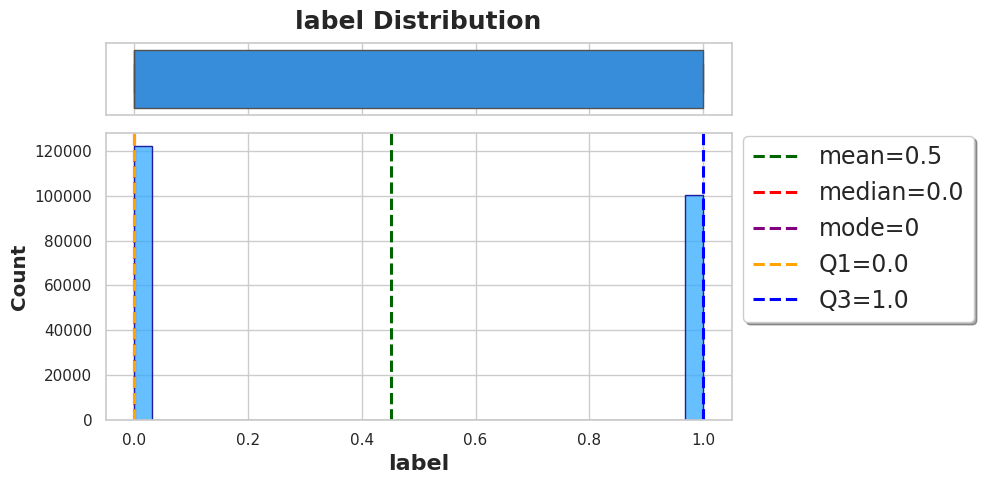

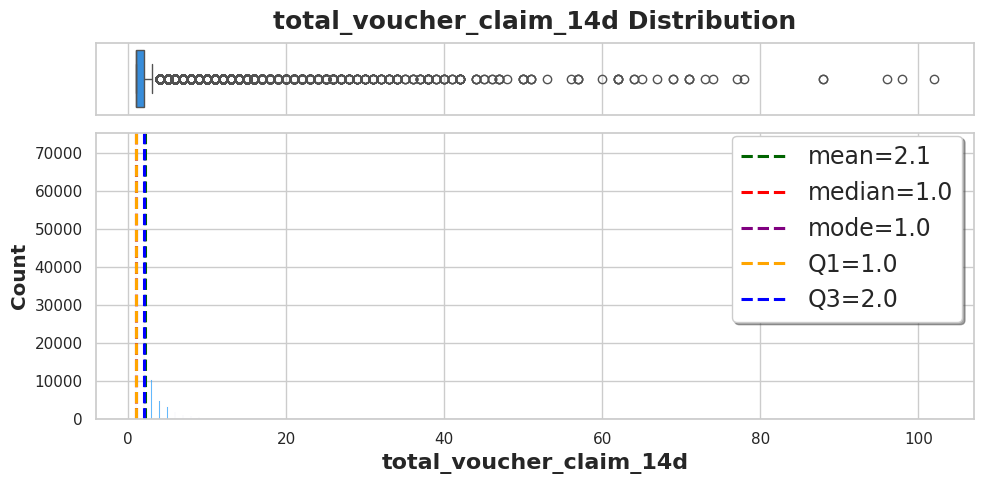

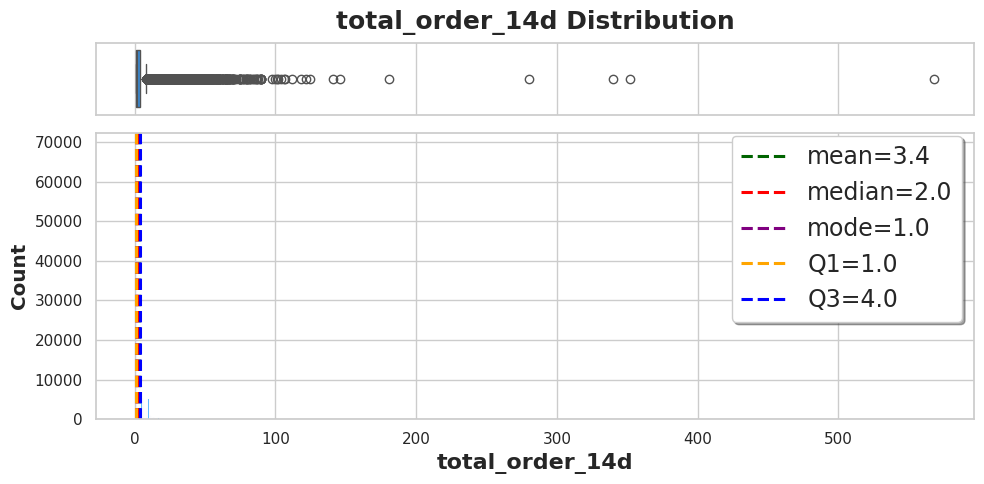

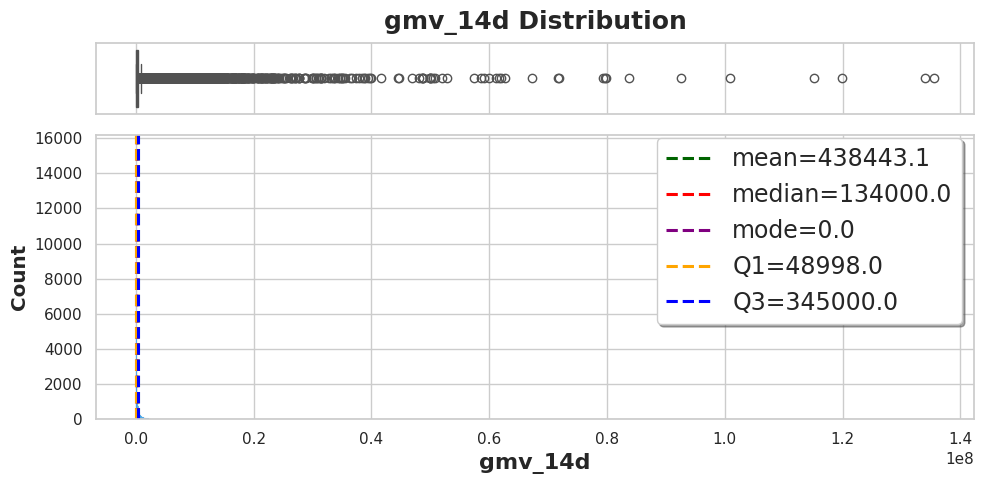

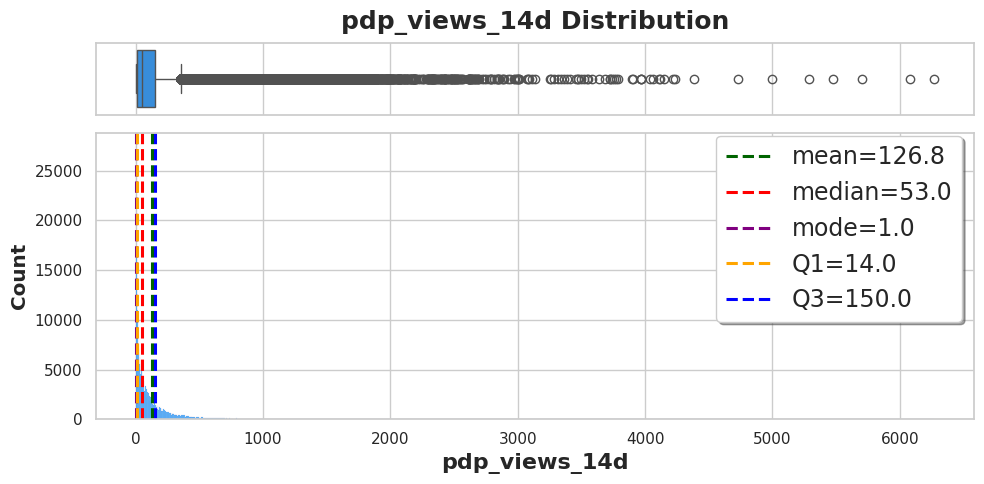

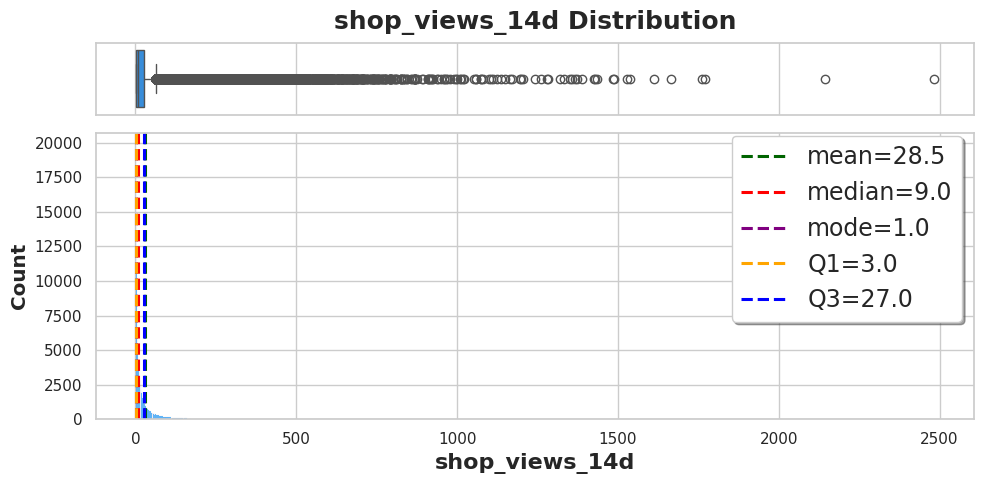

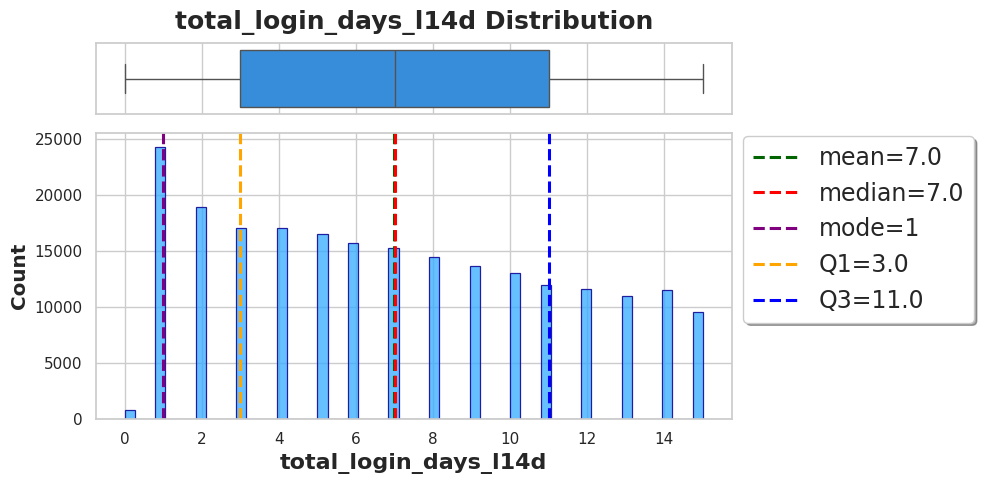

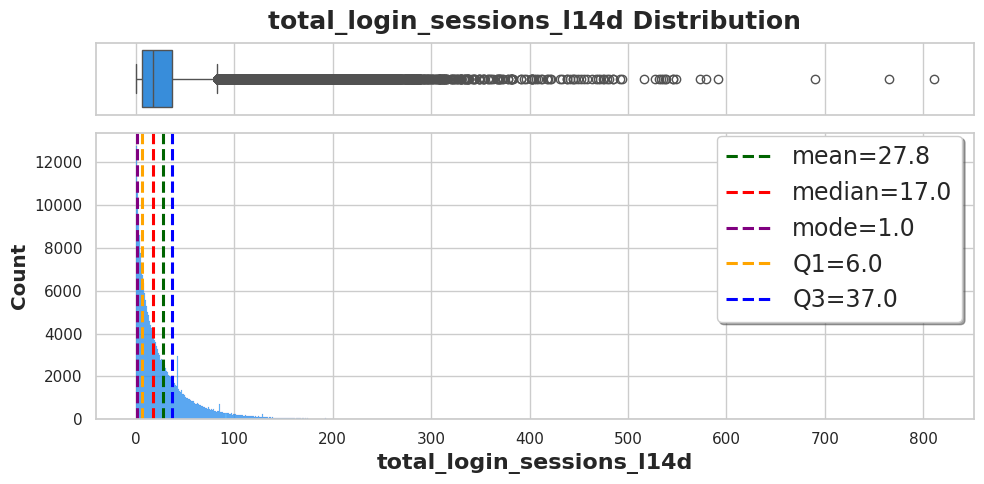

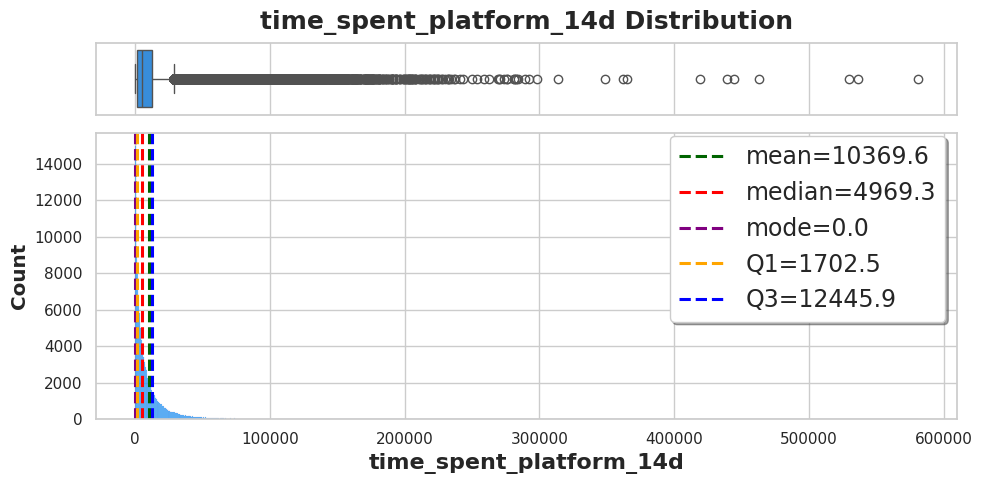

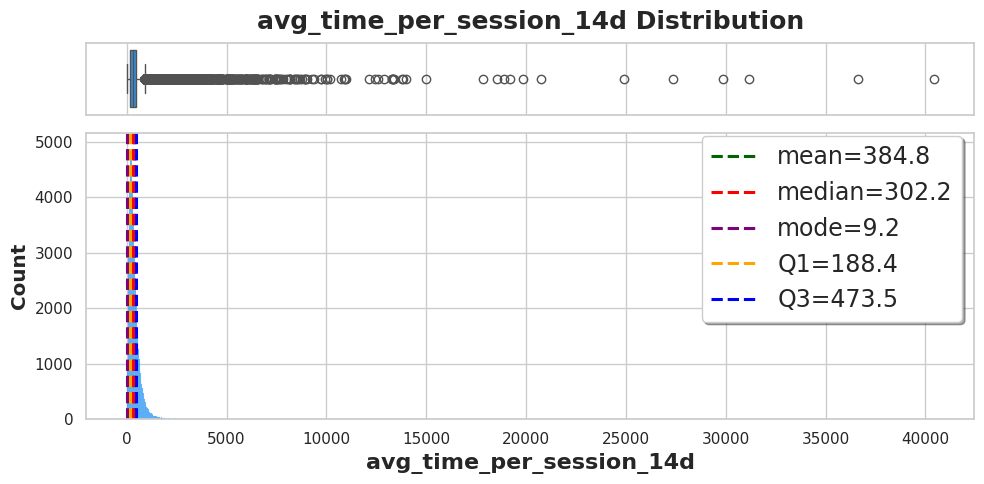

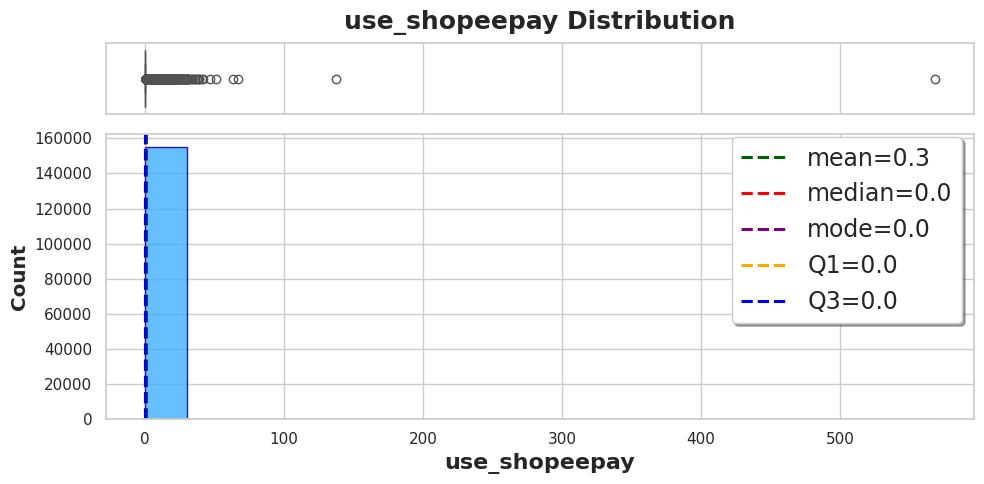

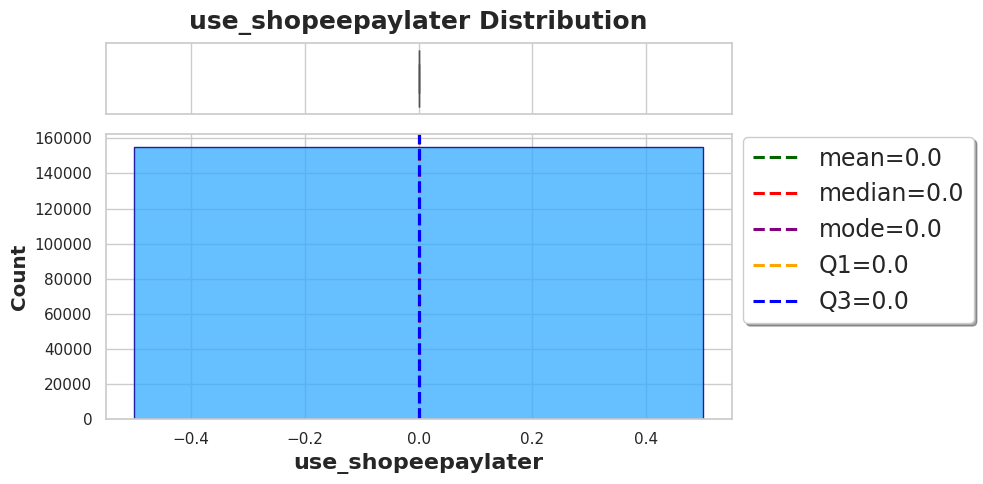

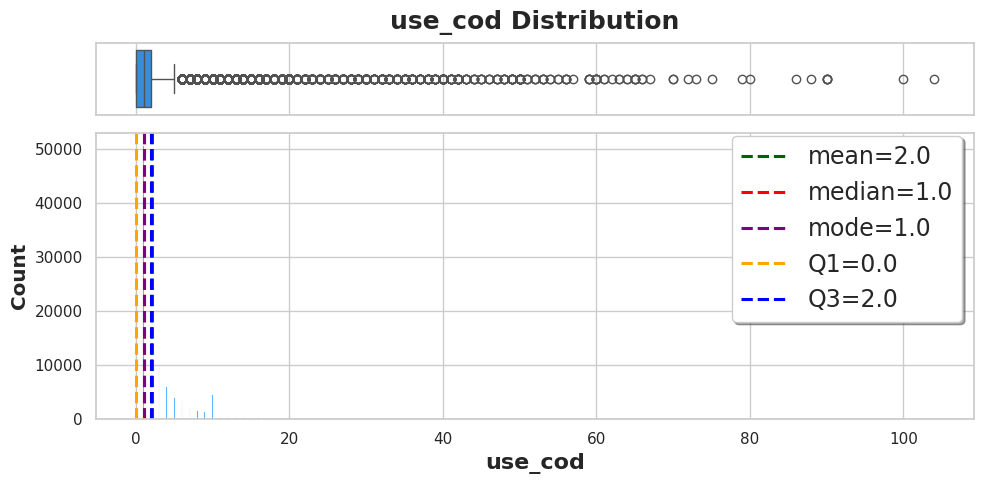

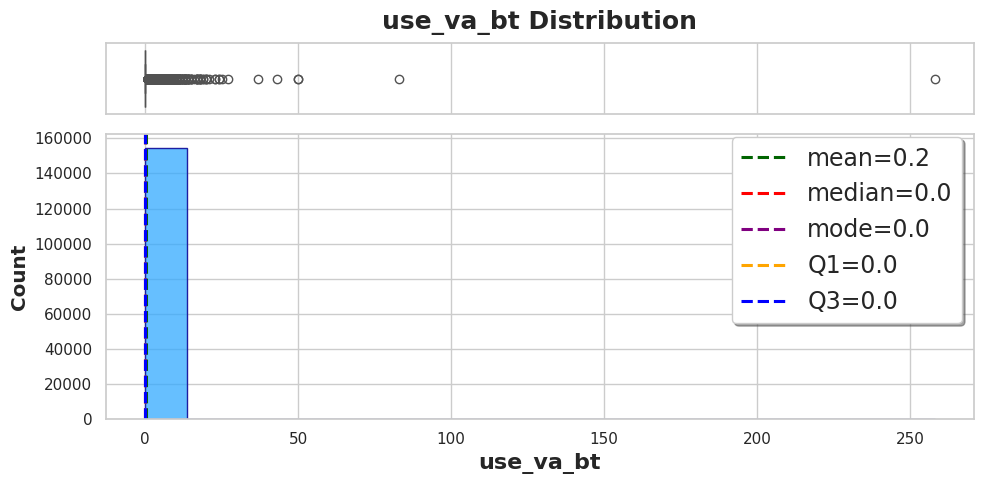

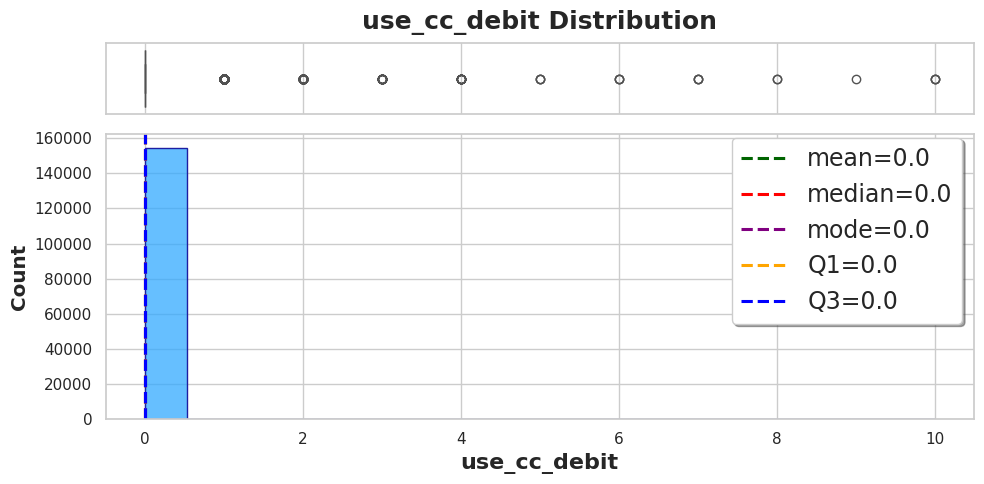

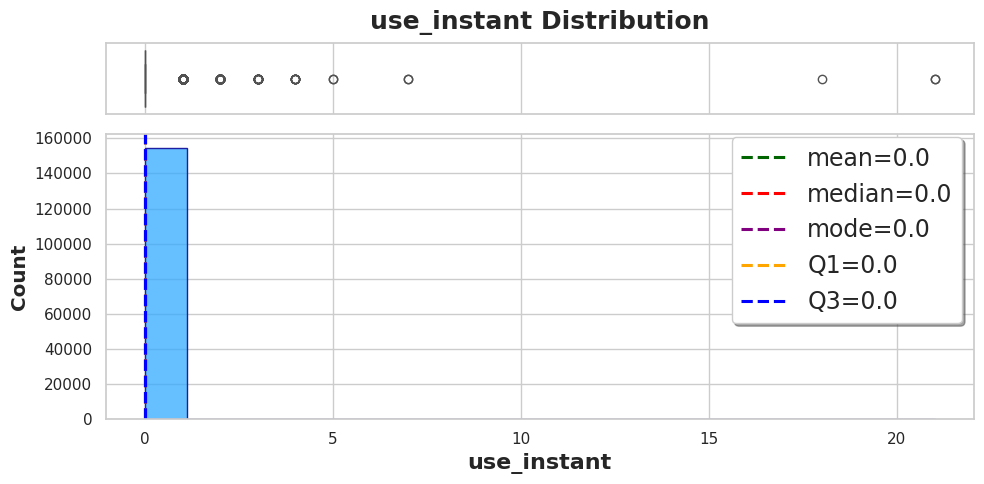

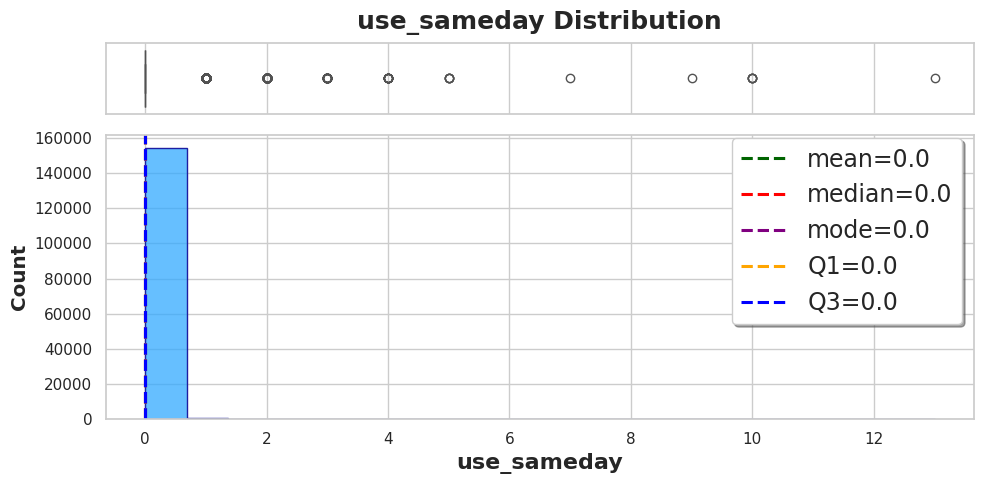

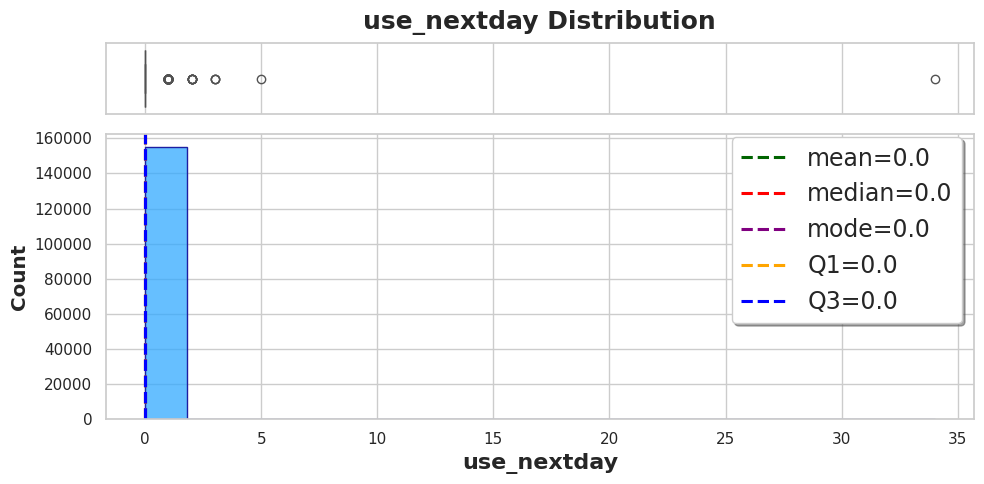

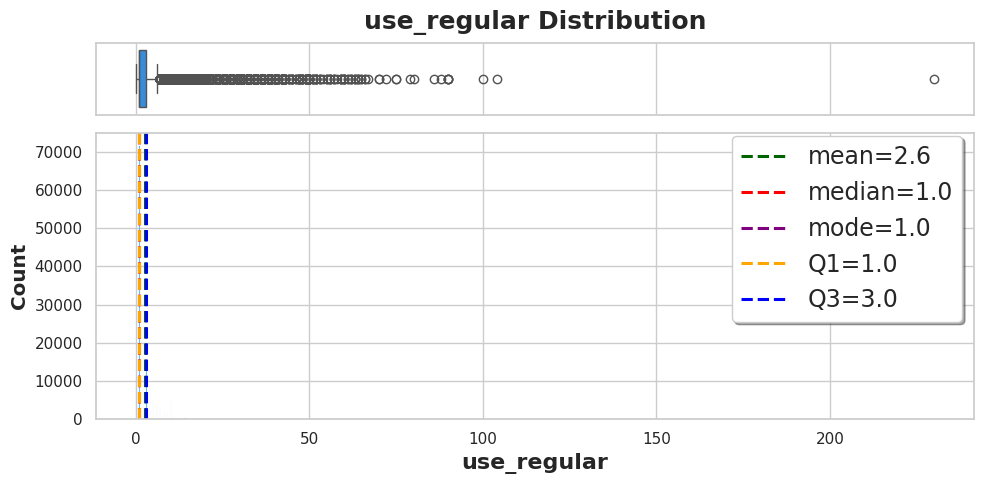

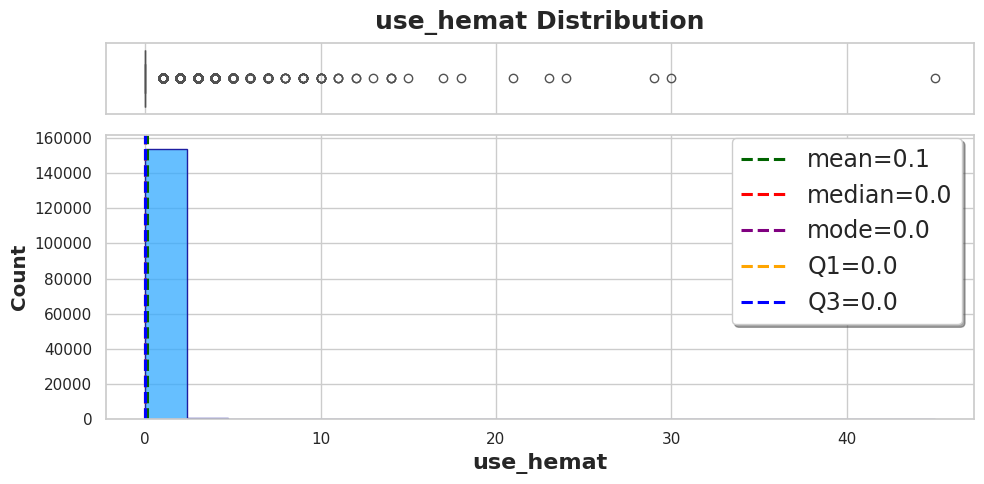

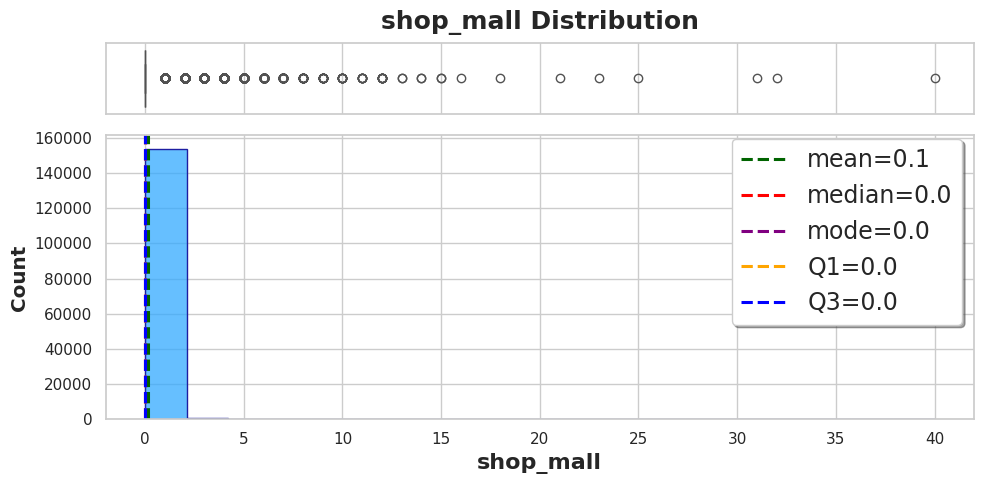

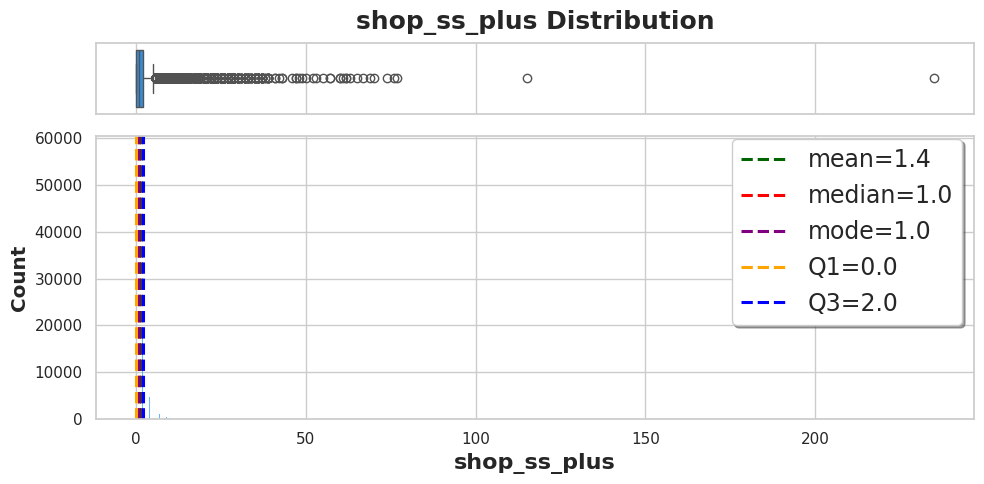

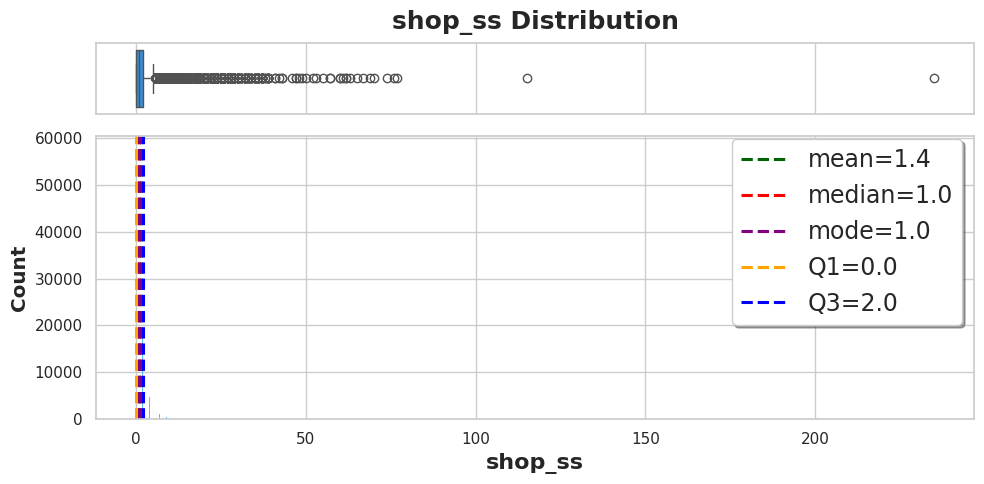

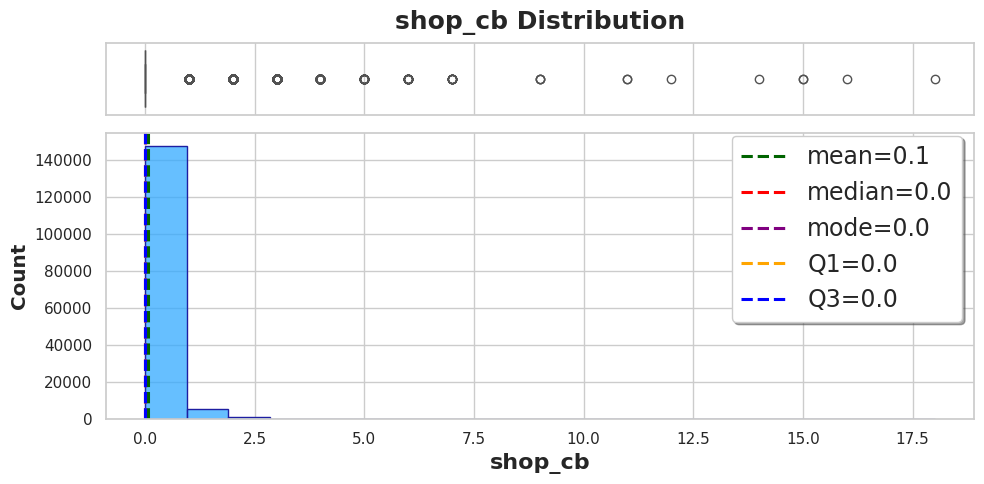

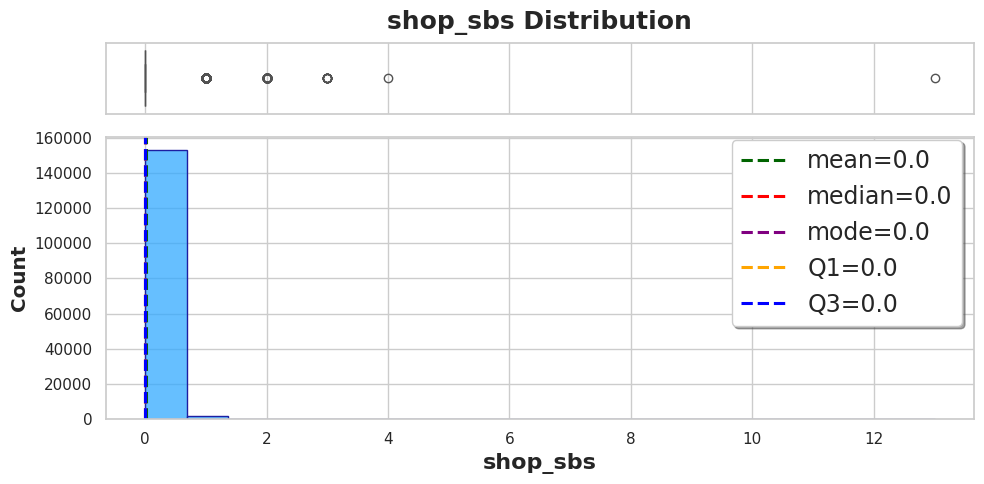

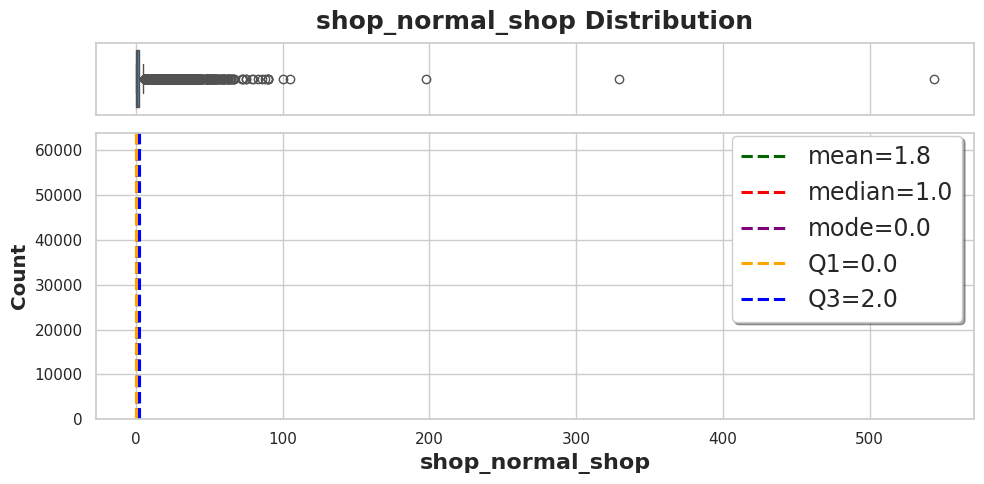

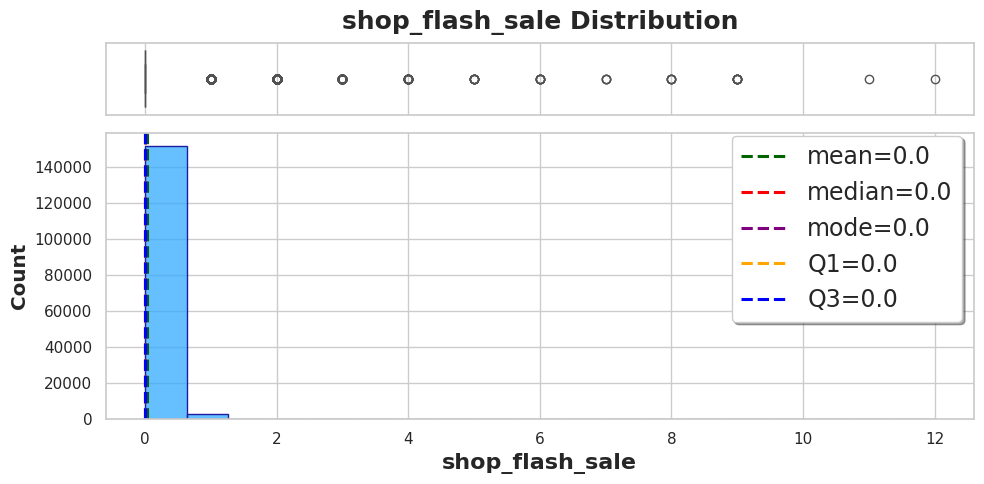

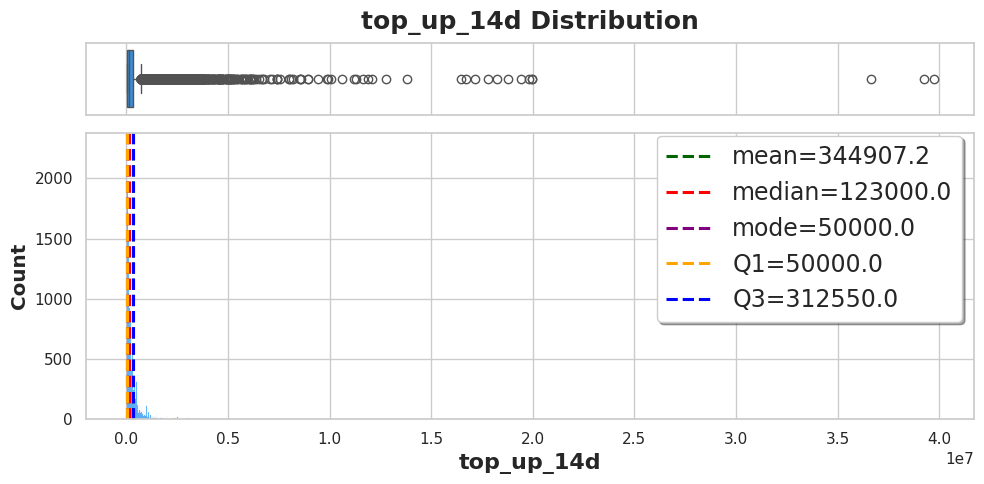

In [65]:
for feature in numerical_feats:
  num_plot(df, feature)

Key Takeways

- The majority of features exhibit a right skew, displaying significant variability in outliers. It is advisable to conduct a bivariate analysis to determine if these features influence the label before considering a log transformation, if necessary.
- The feature `use_shopeepaylater` contains only a single value of '0', consider to remove this feature as it does not contribute any meaningful information for model prediction.

### Imbalance Assesment

#### Imbalance Feature

In [66]:
def top_freq_percentage(dataset, feats):
    top_freq_percentages = {}
    top_categories = {}

    for feature in feats:
        if feature != 'labels':
            value_counts = dataset[feature].value_counts()
            top_categories_list = value_counts.nlargest(3).index.tolist()
            top_freq_percentage_list = (value_counts[top_categories_list] / len(dataset)) * 100

            top_freq_percentages[feature] = top_freq_percentage_list.tolist()
            top_categories[feature] = top_categories_list

    top_freq_percentages_df = pd.DataFrame.from_dict(top_freq_percentages, orient='index', columns=['top1_percentage', 'top2_percentage', 'top3_percentage']).sort_values('top1_percentage', ascending=False)
    top_categories_df = pd.DataFrame.from_dict(top_categories, orient='index', columns=['top1_category', 'top2_category', 'top3_category'])

    result_df = pd.concat([top_freq_percentages_df, top_categories_df], axis=1)
    return result_df

In [67]:
imbalance_df = top_freq_percentage(df, categorical_feats)
imbalance_df

top1_percentage  top2_percentage  top3_percentage  \
is_dp_buyer_14d                96.700            3.300              NaN   
is_buyer_14d                   70.245           29.755              NaN   
age_group                      66.563           11.307            7.780   
is_rural_or_urban              63.089           36.911              NaN   
activate_shopeepay             56.734           43.266              NaN   
gender                         52.867           39.310            7.824   
region                         44.937           37.987           17.076   
new_buyer_initiative           32.725           17.383           12.292   
regist_date                     1.075            0.990            0.965   

                             top1_category top2_category top3_category  
is_dp_buyer_14d                          0             1          None  
is_buyer_14d                             1             0          None  
age_group                          Unknown         19-24           <19  
is_rural_or_urban                    URBAN         RURAL          None  
activate_shopeepay                       1             0          None  
gender                              Female          Male       Unknown  
region                Java non Jabodetabek      Non Java   Jabodetabek  
new_buyer_initiative                   FS0           COD           FSV  
regist_date                     2021-04-30    2021-04-14    2021-04-04

In [68]:
imbalance_df = top_freq_percentage(df, numerical_feats)
imbalance_df

top1_percentage  top2_percentage  top3_percentage  \
use_shopeepaylater                  69.612              NaN              NaN   
use_nextday                         69.574            0.032            0.003   
use_cc_debit                        69.458            0.104            0.027   
use_instant                         69.389            0.175            0.031   
use_sameday                         69.295            0.255            0.040   
shop_sbs                            68.772            0.803            0.031   
shop_flash_sale                     68.035            1.363            0.162   
shop_cb                             66.424            2.569            0.461   
use_hemat                           65.324            3.244            0.653   
shop_mall                           63.372            4.786            0.949   
use_va_bt                           60.716            6.342            1.480   
use_shopeepay                       60.212            5.497            1.564   
label                               54.814           45.186              NaN   
total_voucher_claim_14d             32.299           12.346            4.590   
use_regular                         32.107           12.090            6.065   
total_order_14d                     31.012           12.651            6.873   
shop_normal_shop                    27.390           20.966            8.091   
shop_ss_plus                        25.887           25.462            8.111   
shop_ss                             25.887           25.462            8.111   
use_cod                             22.696           22.497            8.629   
total_login_days_l14d               10.911            8.517            7.678   
shop_views_14d                       8.884            6.518            4.757   
total_login_sessions_l14d            5.694            4.927            4.289   
pdp_views_14d                        3.814            2.824            2.179   
gmv_14d                              2.393            0.737            0.248   
top_up_14d                           0.512            0.494            0.365   
time_spent_platform_14d              0.037            0.001            0.001   
avg_time_per_session_14d             0.001            0.001            0.001   

                           top1_category  top2_category  top3_category  
use_shopeepaylater                 0.000            NaN            NaN  
use_nextday                        0.000          1.000          2.000  
use_cc_debit                       0.000          1.000          2.000  
use_instant                        0.000          1.000          2.000  
use_sameday                        0.000          1.000          2.000  
shop_sbs                           0.000          1.000          2.000  
shop_flash_sale                    0.000          1.000          2.000  
shop_cb                            0.000          1.000          2.000  
use_hemat                          0.000          1.000          2.000  
shop_mall                          0.000          1.000          2.000  
use_va_bt                          0.000          1.000          2.000  
use_shopeepay                      0.000          1.000          2.000  
label                              0.000          1.000            NaN  
total_voucher_claim_14d            1.000          2.000          3.000  
use_regular                        1.000          2.000          3.000  
total_order_14d                    1.000          2.000          3.000  
shop_normal_shop                   0.000          1.000          2.000  
shop_ss_plus                       1.000          0.000          2.000  
shop_ss                            1.000          0.000          2.000  
use_cod                            1.000          0.000          2.000  
total_login_days_l14d              1.000          2.000          3.000  
shop_views_14d                     1.000          2.000          3.000  
total_login_sessions_l14d  

Key Takeaways

- Features `is_dp_buyer_14d`, `is_buyer_14d`, `use_shopeepaylater`, `use_nextday`, `use_cc_debit`, `use_instant`, and `use_sameday` have a single unique value dominating with a count percentage of ~70% or higher. 
- Consider to drop these features if they do not contribute meaningfully to the label, as having most of the data concentrated in one value provides limited variability and is unlikely to offer valuable information for the model.

#### Imbalance Label

In [69]:
unique_value_counts_with_percentage(df['label'])

label   count  percentage
0      0  121895      54.814
1      1  100483      45.186

Key Takeways

- The label distribution is imbalanced, consider using stratification when splitting train and test sets to ensure the distributions are consistent.

### Bivariate Analysis

#### Numerical Features

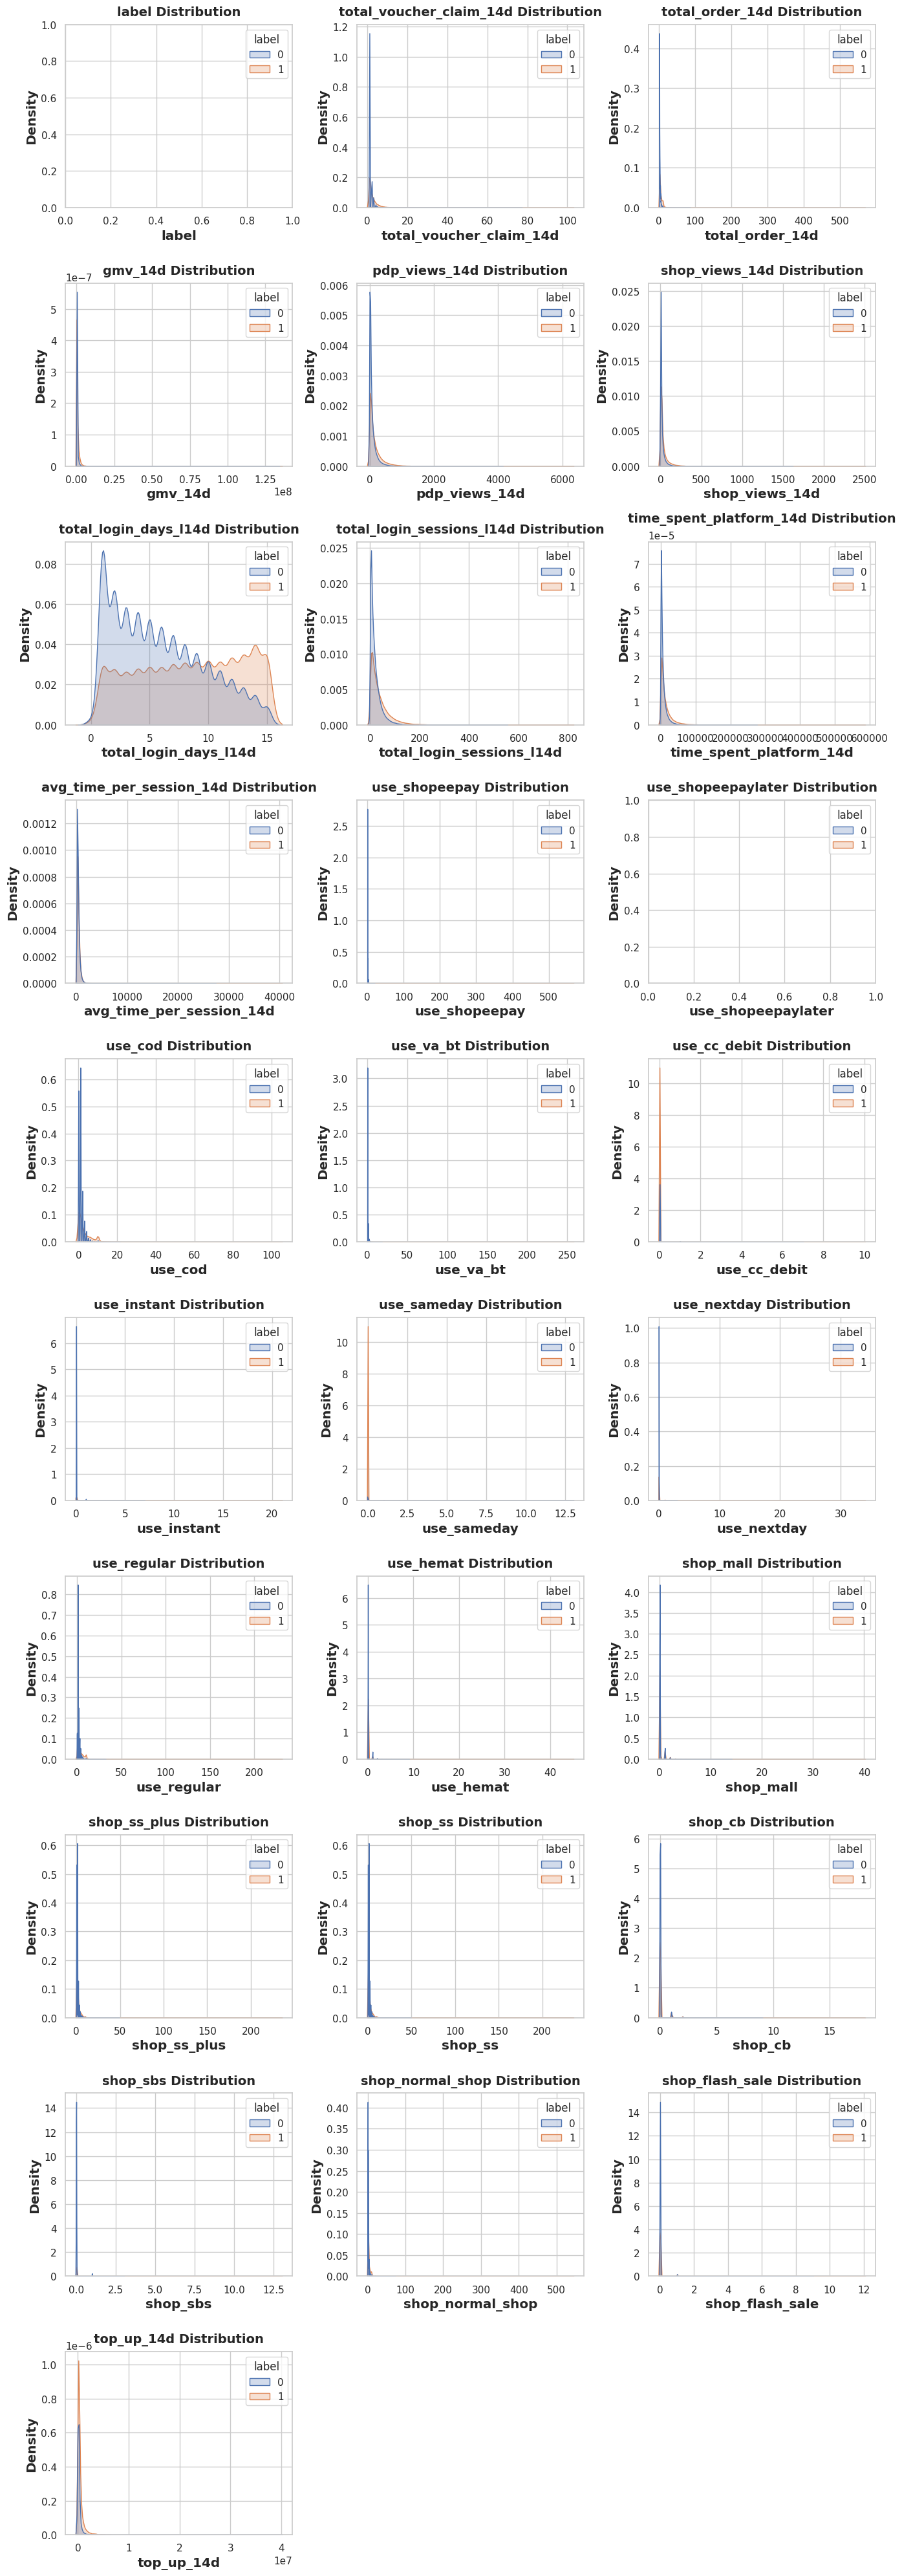

In [70]:
plt.figure(figsize=(14, 40))
for i in range(0, len(numerical_feats)):
    plt.subplot(10, 3, i+1)
    sns.kdeplot(df, x=df[numerical_feats[i]], hue=df['label'], fill=True).set(title=f'{numerical_feats[i]} Distribution')
    plt.tight_layout()

Key Takeways

- feature `total_login_days_l14d` might be an important feature for label prediction because it shows that increased user logins correlate with higher retention, indicating that frequent logins are a strong signal of user loyalty and engagement.

#### Categorical Features

In [71]:
def plot_subscription_counts(feature, df, annotation_threshold=10):
    feature_counts = df.groupby(feature)['label'].value_counts().unstack(fill_value=0)
    
    sorted_index = feature_counts.sum(axis=1).sort_values(ascending=False).index
    feature_counts = feature_counts.loc[sorted_index]
    
    if len(feature_counts.index) > annotation_threshold:
        figsize = (15, 5)
    else:
        figsize = (7, 5)
    plt.figure(figsize=figsize)
    
    total_counts = feature_counts.sum(axis=1)
    yes_percentages = feature_counts[1] / total_counts * 100
    no_percentages = feature_counts[0] / total_counts * 100

    yes_color = sns.color_palette()[0] + (0.5,)
    no_color = sns.color_palette()[1] + (0.5,)
    edge_color = 'lightgray'

    positions = np.arange(len(feature_counts.index))
    
    plt.bar(positions, no_percentages, bottom=yes_percentages, color=no_color, label='0', width=0.4, edgecolor=edge_color)
    plt.bar(positions, yes_percentages, color=yes_color, label='1', width=0.4, edgecolor=edge_color)

    plt.title(f"Label Counts by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Percentage")
    plt.xticks(positions, feature_counts.index, rotation=45)
    plt.legend(title='Label')

    if len(feature_counts.index) <= annotation_threshold:
        for idx, val in enumerate(feature_counts.index):
            yes_count = feature_counts.loc[val, 1]
            no_count = feature_counts.loc[val, 0]
            total = total_counts.loc[val]
            yes_pct = yes_count / total * 100
            no_pct = no_count / total * 100
            plt.text(idx, yes_pct / 2, f'{yes_count}\n({yes_pct:.1f}%)', ha='center', va='center')
            plt.text(idx, yes_pct + no_pct / 2, f'{no_count}\n({no_pct:.1f}%)', ha='center', va='center')
    else:
        print("Too many categories; skipping percentage annotations.")
    
    plt.grid(False)
    plt.show()


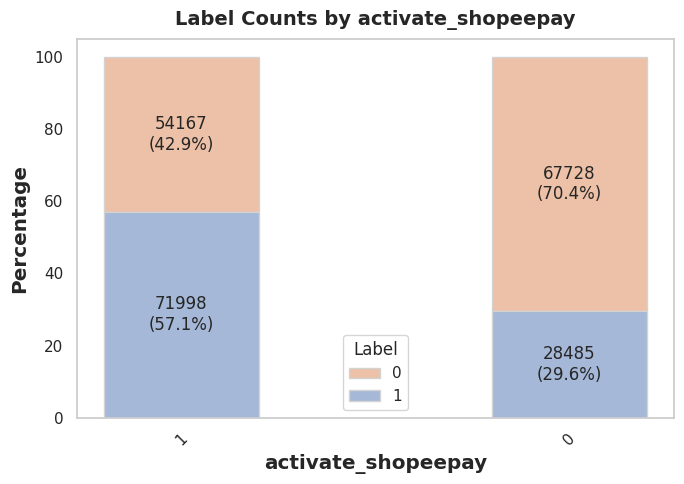

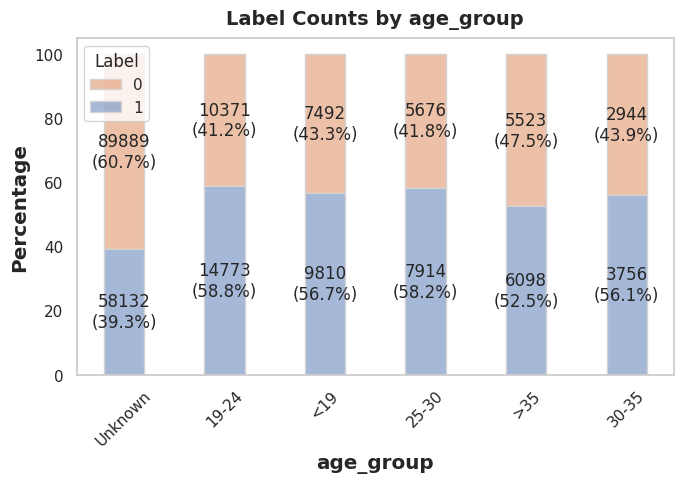

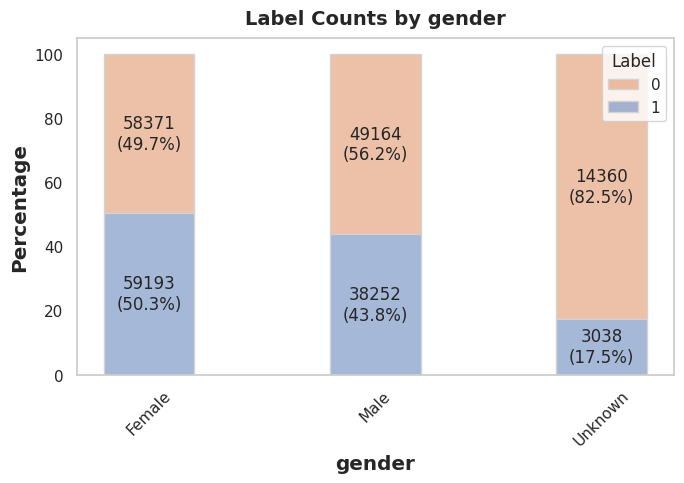

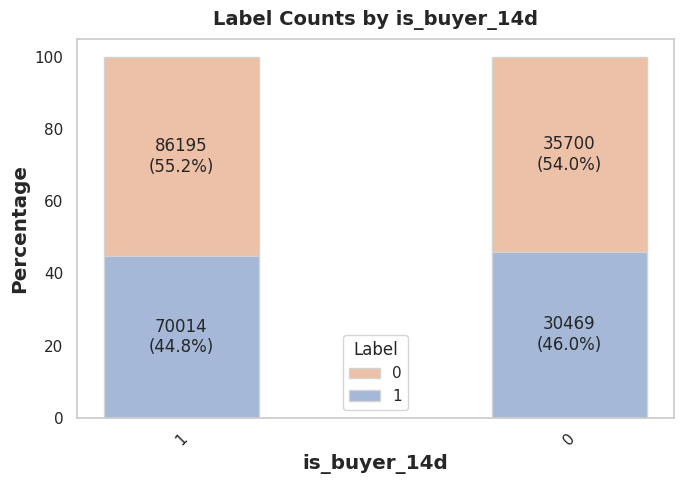

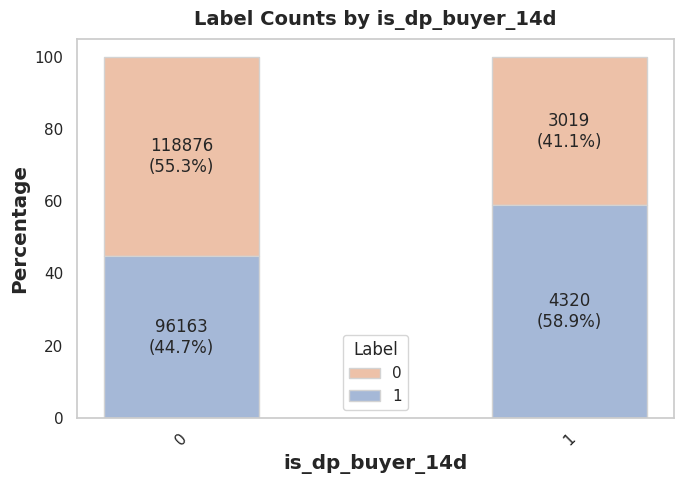

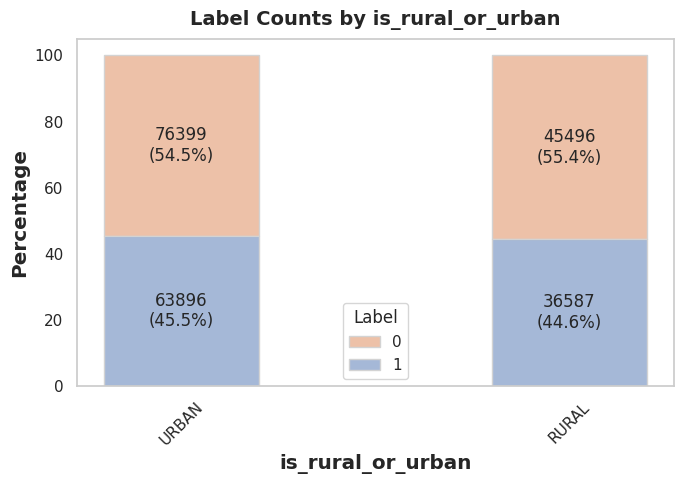

Too many categories; skipping percentage annotations.


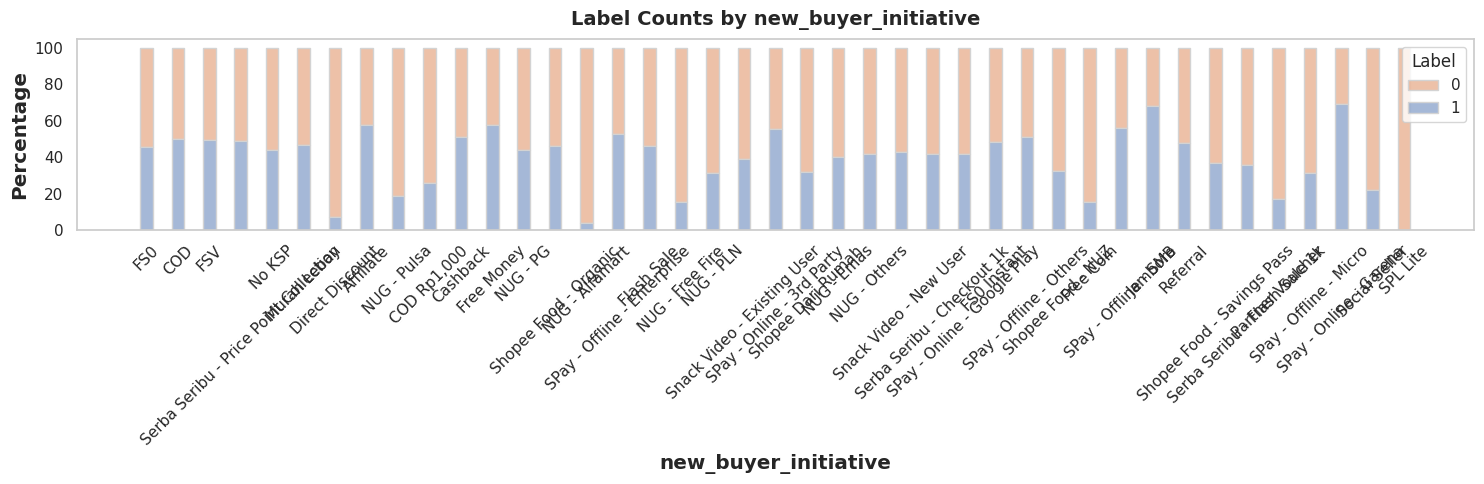

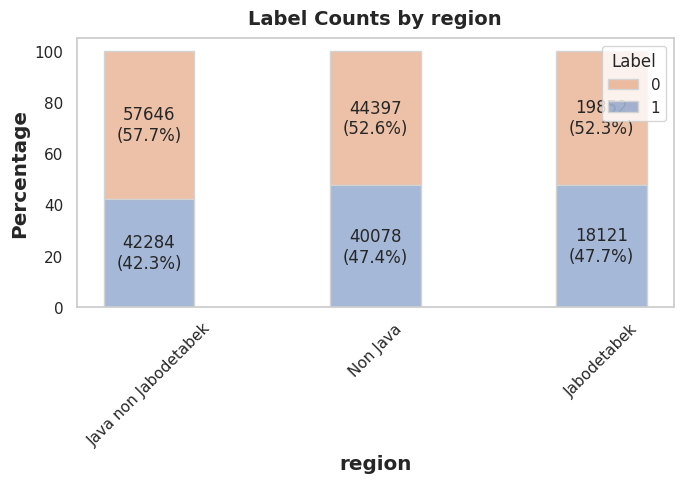

In [72]:
for feature in categorical_feats:
    if feature != 'regist_date':
        plot_subscription_counts(feature, df)

Key Takeways

- Features `activate_shopeepay` and `is_dp_buyer_14d` might be important for label prediction, as users with active ShopeePay or users using down payment tend to show higher retention (label 1).

## 3. Data Dictionary


---



This data dictionary created based on insights and knowledge from data exploration to provide a better understanding of the dataset.

#### 1. User and Registration Information

| **Feature**            | **Description**                                 |
|------------------------|-------------------------------------------------|
| `user_id`              | Unique buyer identifier.                        |
| `regist_date`          | Date of buyer registration.                     |
| `gender`               | Buyer's gender.                                 |
| `age_group`            | Buyer's age group.                              |
| `region`               | Geographical region of the buyer.               |
| `is_rural_or_urban`    | Area classification: rural or urban.            |
| `new_buyer_initiative` | Campaign that attracted the buyer.              |


#### 2. Early Purchase Behavior

| **Feature**       | **Description**                                   |
|-------------------|---------------------------------------------------|
| `is_buyer_14d`    | Purchase made within the first 14 days.           |
| `is_dp_buyer_14d` | Down payment option used within the first 14 days.|


#### 3. Transactional Data

| **Feature**               | **Description**                                        |
|---------------------------|--------------------------------------------------------|
| `total_voucher_claim_14d` | Number of vouchers claimed in the first 14 days.       |
| `total_order_14d`         | Number of orders placed in the first 14 days.          |
| `gmv_14d`                 | Total Gross Merchandise Value (GMV) in the first 14 days.    |


#### 4. Platform Engagement Metrics

| **Feature**                      | **Description**                                        |
|----------------------------------|--------------------------------------------------------|
| `pdp_views_14d`                  | Product detail page views in the first 14 days.        |
| `shop_views_14d`                 | Store page views in the first 14 days.                 |
| `total_login_days_l14d`          | Unique login days in the first 14 days.                |
| `total_login_sessions_l14d`      | Total login sessions in the first 14 days.             |
| `time_spent_platform_14d`        | Total time spent on the platform in the first 14 days. |
| `avg_time_per_session_14d`       | Average time per session in the first 14 days.         |


#### 5. Payment and Financial Activity

| **Feature**           | **Description**                                          |
|-----------------------|----------------------------------------------------------|
| `use_shopeepay`       | Usage frequency of ShopeePay in the first 14 days.       |
| `use_shopeepaylater`  | Usage frequency of ShopeePayLater in the first 14 days.    |
| `use_cod`             | Usage frequency of Cash on Delivery (COD) in the first 14 days. |
| `use_va_bt`           | Usage frequency of Virtual Account/Bank Transfer in the first 14 days. |
| `use_cc_debit`        | Usage frequency of credit/debit cards in the first 14 days.|
| `use_instant`         | Usage frequency of instant payment methods in the first 14 days. |
| `activate_shopeepay`  | Status of ShopeePay account activation.                  |
| `top_up_14d`          | Amount topped-up to the digital wallet in the first 14 days.|


#### 6. Delivery and Shipping Preferences

| **Feature**     | **Description**                                         |
|-----------------|---------------------------------------------------------|
| `use_sameday`   | Same-day delivery option chosen in the first 14 days.   |
| `use_nextday`   | Next-day delivery option chosen in the first 14 days.   |
| `use_regular`   | Regular delivery option chosen in the first 14 days.    |
| `use_hemat`     | Budget-friendly shipping option chosen in the first 14 days.|


#### 7. Shop Interaction Behavior

| **Feature**           | **Description**                                       |
|-----------------------|-------------------------------------------------------|
| `shop_mall`           | Interaction with mall-type shops in the first 14 days.|
| `shop_ss_plus`        | Interaction with SS Plus shops in the first 14 days.  |
| `shop_ss`             | Interaction with SS shops in the first 14 days.       |
| `shop_cb`             | Interaction with CB shops in the first 14 days.       |
| `shop_sbs`            | Interaction with SBS shops in the first 14 days.      |
| `shop_normal_shop`    | Interaction with conventional shops in the first 14 days.|
| `shop_flash_sale`     | Participation in flash sale events in the first 14 days.|


#### 8. Outcome / Label

| **Feature** | **Description**                                 |
|-------------|-------------------------------------------------|
| `label`     | Target variable indicating buyer retention.   |

## 4. Data Preprocessing


---



In [73]:
df_preprocess = df.copy()

### Handling Missing Values

In [74]:
def dynamic_null_queries(col_list):
    summaries = []
    for col_name in col_list:
        query_null_counts = f"""
        SELECT 
            label,
            SUM(CASE WHEN {col_name} IS NULL THEN 1 ELSE 0 END) AS null_count,
            SUM(CASE WHEN {col_name} IS NOT NULL THEN 1 ELSE 0 END) AS not_null_count
        FROM df_preprocess
        GROUP BY label;
        """
        query_zero_count = f"""
        SELECT 
            {col_name}
        FROM df_preprocess
        WHERE {col_name} == 0;
        """
        result_null_counts = duckdb.query(query_null_counts).fetchdf()
        result_zero_count = duckdb.query(query_zero_count).fetchdf()
        
        is_have_0_value = not result_zero_count.empty
        
        try:
            label0 = result_null_counts.loc[result_null_counts['label'] == 0].iloc[0]
            label1 = result_null_counts.loc[result_null_counts['label'] == 1].iloc[0]
            null_count_0 = label0['null_count']
            null_count_1 = label1['null_count']
            not_null_count_0 = label0['not_null_count']
            not_null_count_1 = label1['not_null_count']
            if (null_count_0 < null_count_1) and (not_null_count_0 > not_null_count_1):
                correlation = "Negative correlation"
            elif (null_count_0 > null_count_1) and (not_null_count_0 < not_null_count_1):
                correlation = "Positive correlation"
            else:
                correlation = "No Insight"
        except Exception:
            correlation = "No Insight (insufficient label data)"
        
        summaries.append({
            "null_feature": col_name,
            "null_percentage": desc_df.loc[desc_df['feature'] == col_name, 'null_percentage'].values[0],
            "is_have_0_value": is_have_0_value,
            "deduced_correlation_based_on_null": correlation
        })
    summary_df = pd.DataFrame(summaries)
    return summary_df

1. **Checks for 0 Values**:
   - Queries the dataset to check if a given feature contains the value `0`.
   - If the feature has at least one `0` value, it marks `is_have_0_value` as `True`.

2. **Deduces Correlation Based on Null Values**:
   - Groups the dataset by `label` and calculates the count of `NULL` and `NOT NULL` values for each feature.
   - Based on the comparison of `NULL` and `NOT NULL` counts for `label = 0` and `label = 1`, it deduces the correlation:
     - **Negative Correlation**: If the `NULL` count is higher for `label = 1` but lower for `label = 0` and vice versa for `NOT NULL`.
     - **Positive Correlation**: If the `NULL` count is lower for `label = 1` but higher for `label = 0` and vice versa for `NOT NULL`.
     - **No Insight**: If neither of the above patterns exists.

#### High Missing Value (>90%)


In [75]:
null_feature = [
    "top_up_14d"
]

summary_null_features = dynamic_null_queries(null_feature)
summary_null_features

null_feature  null_percentage  is_have_0_value  \
0   top_up_14d           92.170            False   

  deduced_correlation_based_on_null  
0              Positive correlation

In [76]:
duckdb.query("""
SELECT 
    label,
    SUM(CASE WHEN top_up_14d IS NULL THEN 1 ELSE 0 END) AS null_count,
    SUM(CASE WHEN top_up_14d IS NOT NULL THEN 1 ELSE 0 END) AS not_null_count
FROM df_preprocess
GROUP BY label;
""")

┌───────┬────────────┬────────────────┐
│ label │ null_count │ not_null_count │
│ int64 │   int128   │     int128     │
├───────┼────────────┼────────────────┤
│     0 │     115615 │           6280 │
│     1 │      89351 │          11132 │
└───────┴────────────┴────────────────┘

### Key Takeaways:
- Even though `top_up_14d` has 92.17% missing values, it does not contain actual `0` values, making it valid to impute the missing values with `0`.
- The quary correlation analysis shows that null values in `top_up_14d` provide meaningful insights into the label, suggesting the potential to create a new feature indicating whether the user performed a top-up within the first 14 days.

##### Feature Engineering


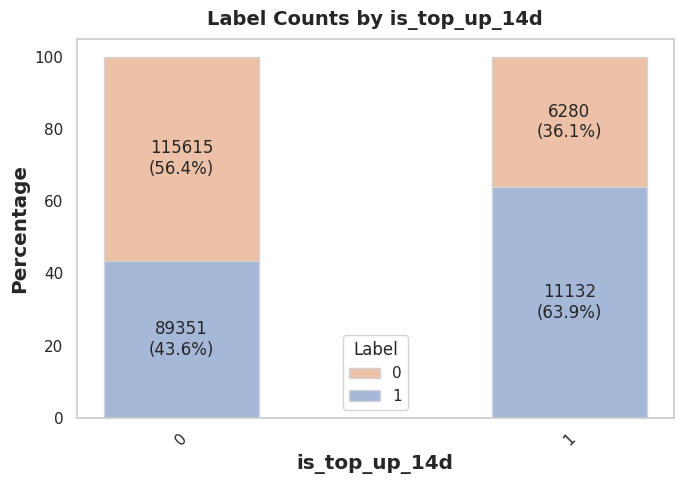

In [77]:
df_preprocess['is_top_up_14d'] = df_preprocess['top_up_14d'].notnull().astype(int)
plot_subscription_counts('is_top_up_14d', df_preprocess)

In [78]:
df_preprocess['top_up_14d'].fillna(0, inplace=True)

#### Moderate Missing Value (27-44%)


In [79]:
null_feature = [
    "total_voucher_claim_14d", "gmv_14d", "total_order_14d",
    "use_cod", "shop_sbs", "shop_normal_shop", "shop_cb", "shop_ss", 
    "shop_flash_sale", "use_shopeepay", "shop_ss_plus", "use_shopeepaylater", 
    "use_sameday", "use_hemat", "use_regular", "use_nextday", "use_cc_debit", 
    "use_instant", "use_va_bt", "shop_mall", "shop_views_14d"
]

summary_null_features = dynamic_null_queries(null_feature)
summary_null_features

null_feature  null_percentage  is_have_0_value  \
0   total_voucher_claim_14d           44.030            False   
1                   gmv_14d           30.390             True   
2           total_order_14d           30.390            False   
3                   use_cod           30.390             True   
4                  shop_sbs           30.390             True   
5          shop_normal_shop           30.390             True   
6                   shop_cb           30.390             True   
7                   shop_ss           30.390             True   
8           shop_flash_sale           30.390             True   
9             use_shopeepay           30.390             True   
10             shop_ss_plus           30.390             True   
11       use_shopeepaylater           30.390             True   
12              use_sameday           30.390             True   
13                use_hemat           30.390             True   
14              use_regular           30.390             True   
15              use_nextday           30.390             True   
16             use_cc_debit           30.390             True   
17              use_instant           30.390             True   
18                use_va_bt           30.390             True   
19                shop_mall           30.390             True   
20           shop_views_14d           27.370            False   

   deduced_correlation_based_on_null  
0                         No Insight  
1                         No Insight  
2                         No Insight  
3                         No Insight  
4                         No Insight  
5                         No Insight  
6                         No Insight  
7                         No Insight  
8                         No Insight  
9                         No Insight  
10                        No Insight  
11                        No Insight  
12                        No Insight  
13                        No Insight  
14                        No Insight  
15                        No Insight  
16                        No Insight  
17                        No Insight  
18                        No Insight  
19                        No Insight  
20                        No Insight

### Key Takeaways

- Features such as `gmv_14d`, `use_cod`, `shop_sbs`, `shop_normal_shop`, `shop_cb`, `shop_ss`, `shop_flash_sale`, `use_shopeepay`, `shop_ss_plus`, `use_shopeepaylater`, `use_sameday`, `use_hemat`, `use_regular`, `use_nextday`, `use_cc_debit`, `use_instant`, `use_va_bt`, and `shop_mall` have `0` values and show no insight based on null correlation.
- Even though those feature have `0` value, i think fill missing value with `0` still correct because it represents a real scenario (e.g., no purchase, no usage, or no activity). Changing or imputing these values may distort the meaning of the feature and reduce the model's ability to learn from actual user behavior.

In [80]:
df_preprocess.loc[:, null_feature] = df_preprocess.loc[:, null_feature].fillna(0)

#### Low Missing Value (< 5%)

In [81]:
null_feature = [
    "pdp_views_14d", "avg_time_per_session_14d", "time_spent_platform_14d",
    "total_login_sessions_l14d",
]

summary_null_features = dynamic_null_queries(null_feature)
summary_null_features

null_feature  null_percentage  is_have_0_value  \
0              pdp_views_14d            3.760            False   
1   avg_time_per_session_14d            0.390            False   
2    time_spent_platform_14d            0.360             True   
3  total_login_sessions_l14d            0.360             True   

  deduced_correlation_based_on_null  
0                        No Insight  
1                        No Insight  
2                        No Insight  
3                        No Insight

In [82]:
df_preprocess.loc[:, null_feature] = df_preprocess.loc[:, null_feature].fillna(0)

#### Categorical Missing Value

In [83]:
duckdb.query("""
    SELECT 
        new_buyer_initiative,
        count(*),
    FROM df_preprocess
    GROUP BY new_buyer_initiative;
""").df()

new_buyer_initiative  count_star()
0                 SPay - Offline - Others           167
1                  SPay - Offline - Micro            19
2                                  No KSP         17263
3                               Affiliate          6470
4               SPay - Online - 3rd Party           453
5                  SPay - Online - Garena            13
6                             Murah Lebay         11859
7                                NUG - PG          1244
8                   Shopee Food - Organic          1091
9            Serba Seribu - Flash Sale 1k            39
10                               Cashback          1976
11                 Snack Video - New User           205
12                        Direct Discount          8179
13                        NUG - Free Fire           557
14                        Partner Voucher            29
15                               SPL Lite             7
16                                Jambore            53
17             Shopee Food - Savings Pass            49
18                            COD Rp1,000          2836
19            SPay - Online - Google Play           189
20                      Shopee Food - NUZ           145
21                                    FSV         27334
22                             Flash Sale           633
23                          Social Seller             9
24            SPay - Offline - Enterprise           643
25  Serba Seribu - Price Point Collection         21331
26                            NUG - Pulsa          2922
27                   SPay - Offline - SMB           111
28                           NUG - Others           219
29                      Shopee Dari Rumah           291
30                            FS0 Instant           186
31                         NUG - Alfamart           881
32                                    FS0         72774
33                                   None           378
34                             Free Money          1499
35                              Free Coin           125
36                               Referral            52
37                             NUG - Emas           277
38                                    COD         38656
39                              NUG - PLN           531
40            Snack Video - Existing User           489
41             Serba Seribu - Checkout 1k           194

In [84]:
print("deduced_correlation_based_on_null for new_buyer_initiative")
duckdb.query("""
    SELECT 
        label,
        SUM(CASE WHEN new_buyer_initiative IS NULL THEN 1 ELSE 0 END) AS null_count,
        SUM(CASE WHEN new_buyer_initiative IS NOT NULL THEN 1 ELSE 0 END) AS not_null_count
    FROM df_preprocess
    GROUP BY label;
""")

deduced_correlation_based_on_null for new_buyer_initiative


┌───────┬────────────┬────────────────┐
│ label │ null_count │ not_null_count │
│ int64 │   int128   │     int128     │
├───────┼────────────┼────────────────┤
│     0 │        155 │         121740 │
│     1 │        223 │         100260 │
└───────┴────────────┴────────────────┘

In [85]:
# Define mapping for grouped categories; any value not explicitly mapped will be assigned to "Others"
initiative_mapping = {
    # SPay Offline group
    "SPay - Offline - Others": "SPay Offline",
    "SPay - Offline - Micro": "SPay Offline",
    "SPay - Offline - Enterprise": "SPay Offline",
    "SPay - Offline - SMB": "SPay Offline",
    
    # SPay Online group
    "SPay - Online - 3rd Party": "SPay Online",
    "SPay - Online - Garena": "SPay Online",
    "SPay - Online - Google Play": "SPay Online",
    
    # Serba Seribu group
    "Serba Seribu - Price Point Collection": "Serba Seribu",
    "Serba Seribu - Checkout 1k": "Serba Seribu",
    "Serba Seribu - Flash Sale 1k": "Serba Seribu",
    
    # NUG group
    "NUG - Pulsa": "NUG",
    "NUG - Others": "NUG",
    "NUG - Alfamart": "NUG",
    "NUG - Free Fire": "NUG",
    "NUG - Emas": "NUG",
    "NUG - PLN": "NUG",
    "NUG - PG": "NUG",
    
    # Flash Sale group
    "FS0 Instant": "Flash Sale",
    "FSV": "Flash Sale",
    "Flash Sale": "Flash Sale",
    "FS0": "Flash Sale",
    
    # Shopee Food group
    "Shopee Food - Organic": "Shopee Food",
    "Shopee Food - NUZ": "Shopee Food",
    "Shopee Food - Savings Pass": "Shopee Food"
}

df_preprocess['new_buyer_initiative_category'] = df_preprocess['new_buyer_initiative'].apply(
    lambda x: initiative_mapping.get(x, "Others")
)

df_preprocess.drop('new_buyer_initiative', axis=1, inplace=True)

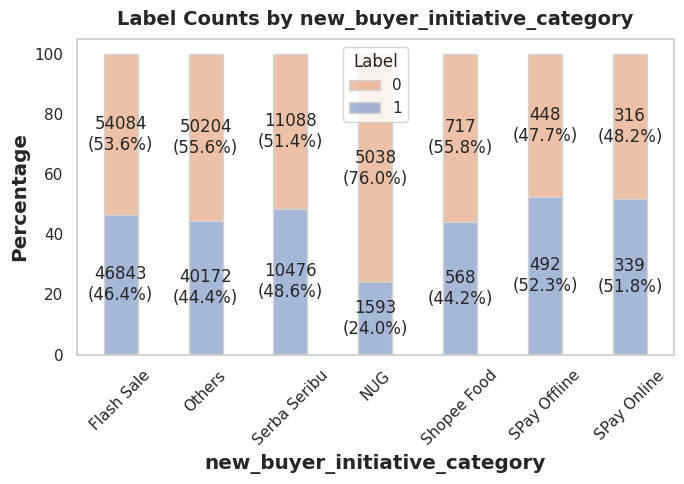

In [86]:
plot_subscription_counts('new_buyer_initiative_category', df_preprocess)

Key Takeways

- Imputing missing value with 'Others' because new_buyer_initiative is categorical feature
- NUG category might be important for label prediction, as users with these category tend to show lower retention (label 0)

In [87]:
na_counts = df_preprocess.isna().sum()
print(na_counts[na_counts > 0])

Series([], dtype: int64)


### Label Encoding

In [88]:
categorical_feats = df_preprocess.dtypes[df_preprocess.dtypes == "object"].index
categorical_feats

Index(['regist_date', 'gender', 'age_group', 'region', 'is_rural_or_urban',
       'new_buyer_initiative_category'],
      dtype='object')

In [89]:
df_preprocess[categorical_feats].head()

regist_date  gender age_group       region is_rural_or_urban  \
0  2021-04-06  Female     19-24  Jabodetabek             RURAL   
1  2021-05-08  Female     19-24  Jabodetabek             RURAL   
2  2021-05-01  Female     19-24  Jabodetabek             RURAL   
3  2021-05-29  Female     19-24  Jabodetabek             RURAL   
4  2021-04-06  Female     19-24  Jabodetabek             RURAL   

  new_buyer_initiative_category  
0                  Serba Seribu  
1                        Others  
2                    Flash Sale  
3                        Others  
4                    Flash Sale

#### is_rural_or_urban

In [90]:
# Education
rural_mapping = {'RURAL': 1, 'URBAN': 0}

df_preprocess['is_rural'] = df_preprocess['is_rural_or_urban'].map(rural_mapping)
df_preprocess.drop('is_rural_or_urban', axis=1, inplace=True)
df_preprocess['is_rural'].value_counts()

is_rural
0    140295
1     82083
Name: count, dtype: int64

#### age_group

In [91]:
age_group_mapping = {'Unknown': -1, '<19': 1, '19-24': 2, '25-30': 3, '30-35': 4, '>35': 5}
df_preprocess['age_group_category'] = df_preprocess['age_group'].map(age_group_mapping)
df_preprocess.drop('age_group', axis=1, inplace=True)
df_preprocess['age_group_category'].value_counts()

age_group_category
-1    148021
 2     25144
 1     17302
 3     13590
 5     11621
 4      6700
Name: count, dtype: int64

#### regist_date

In [92]:
duckdb.query("""
SELECT 
    EXTRACT(year FROM CAST(regist_date AS DATE)) AS year,
    EXTRACT(month FROM CAST(regist_date AS DATE)) AS month,
    COUNT(*) AS count
FROM df_preprocess
GROUP BY 1, 2
ORDER BY 1, 2;
""")

┌───────┬───────┬───────┐
│ year  │ month │ count │
│ int64 │ int64 │ int64 │
├───────┼───────┼───────┤
│  2021 │     1 │ 42213 │
│  2021 │     2 │ 36245 │
│  2021 │     3 │ 44700 │
│  2021 │     4 │ 52756 │
│  2021 │     5 │ 46464 │
└───────┴───────┴───────┘

In [93]:
df_preprocess['regist_date'] = pd.to_datetime(df_preprocess['regist_date'])
df_preprocess['regist_month'] = df_preprocess['regist_date'].dt.month
df_preprocess['regist_on_weekday'] = df_preprocess['regist_date'].apply(lambda x: 1 if x.weekday() < 5 else 0)
df_preprocess.drop('regist_date', axis=1, inplace=True)

print(df_preprocess['regist_month'].value_counts())
print()
print(df_preprocess['regist_on_weekday'].value_counts())

regist_month
4    52756
5    46464
3    44700
1    42213
2    36245
Name: count, dtype: int64

regist_on_weekday
1    159711
0     62667
Name: count, dtype: int64


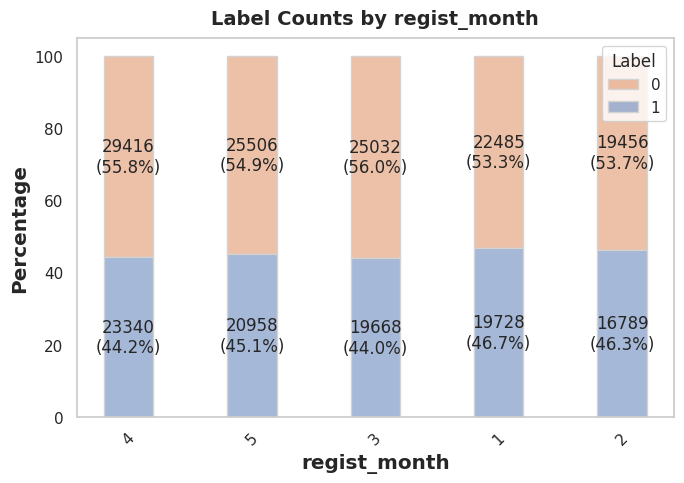

In [94]:
plot_subscription_counts('regist_month', df_preprocess)

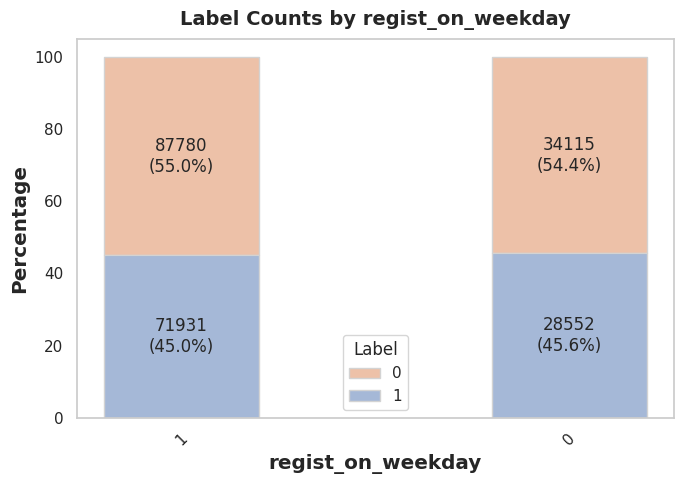

In [95]:
plot_subscription_counts('regist_on_weekday', df_preprocess)

### One-Hot Encoding

In [96]:
features_to_encode = ['gender', 'region', 'new_buyer_initiative_category']

for feature in features_to_encode:
    df_preprocess = pd.get_dummies(df_preprocess, columns=[feature], dtype=int)

In [97]:
df_preprocess.head()

is_buyer_14d  is_dp_buyer_14d  label  total_voucher_claim_14d  \
0             0                0      0                    0.000   
1             0                0      0                    0.000   
2             0                0      0                    0.000   
3             0                0      0                    0.000   
4             0                0      0                    0.000   

   total_order_14d  gmv_14d  pdp_views_14d  shop_views_14d  \
0            0.000    0.000         36.000           0.000   
1            0.000    0.000          4.000           0.000   
2            0.000    0.000         77.000           0.000   
3            0.000    0.000          7.000           0.000   
4            0.000    0.000         77.000           9.000   

   total_login_days_l14d  total_login_sessions_l14d  time_spent_platform_14d  \
0                      3                      5.000                 1325.322   
1                      4                      4.000                 2633.400   
2                      3                      3.000                 3305.075   
3                      1                      1.000                  700.040   
4                      8                     28.000                 6228.460   

   avg_time_per_session_14d  use_shopeepay  use_shopeepaylater  use_cod  \
0                   265.064          0.000               0.000    0.000   
1                   658.350          0.000               0.000    0.000   
2                  1101.692          0.000               0.000    0.000   
3                   700.040          0.000               0.000    0.000   
4                   222.445          0.000               0.000    0.000   

   use_va_bt  use_cc_debit  use_instant  use_sameday  use_nextday  \
0      0.000         0.000        0.000        0.000        0.000   
1      0.000         0.000        0.000        0.000        0.000   
2      0.000         0.000        0.000        0.000        0.000   
3      0.000         0.000        0.000        0.000        0.000   
4      0.000         0.000        0.000        0.000        0.000   

   use_regular  use_hemat  shop_mall  shop_ss_plus  shop_ss  shop_cb  \
0        0.000      0.000      0.000         0.000    0.000    0.000   
1        0.000      0.000      0.000         0.000    0.000    0.000   
2        0.000      0.000      0.000         0.000    0.000    0.000   
3        0.000      0.000      0.000         0.000    0.000    0.000   
4        0.000      0.000      0.000         0.000    0.000    0.000   

   shop_sbs  shop_normal_shop  shop_flash_sale  activate_shopeepay  \
0     0.000             0.000            0.000                   0   
1     0.000             0.000            0.000                   0   
2     0.000             0.000            0.000                   0   
3     0.000             0.000            0.000                   0   
4     0.000             0.000            0.000                   0   

   top_up_14d  is_top_up_14d  is_rural  age_group_category  regist_month  \
0       0.000              0         1                   2             4   
1       0.000              0         1                   2             5   
2       0.000              0         1                   2             5   
3       0.000              0         1                   2             5   
4       0.000              0         1                   2             4   

   regist_on_weekday  gender_Female  gender_Male  gender_Unknown  \
0                  1              1            0               0   
1                  0              1            0               0   
2                  0              1            0               0   
3                  0              1            0               0   
4                  1              1            0               0   

   region_Jabodetabek  region_Java non Jabodetabek  region_Non Java  \
0                   1                            0                0   
1           

In [98]:
df_preprocess_all = df_preprocess.copy()

### Correlation Matrix

In [99]:
df_select_corr = df_preprocess.corr()['label'][:-1]
best_feature = df_select_corr[abs(df_select_corr) >= 0.1].sort_values(ascending=False)
drop_feature = df_select_corr[abs(df_select_corr) < 0.1].sort_values(ascending=False)

In [100]:
low_corr_feature = drop_feature.index.tolist()
low_corr_feature

['use_shopeepay',
 'avg_time_per_session_14d',
 'shop_cb',
 'top_up_14d',
 'shop_mall',
 'shop_flash_sale',
 'is_dp_buyer_14d',
 'use_hemat',
 'region_Non Java',
 'use_va_bt',
 'region_Jabodetabek',
 'new_buyer_initiative_category_Flash Sale',
 'new_buyer_initiative_category_Serba Seribu',
 'use_sameday',
 'new_buyer_initiative_category_SPay Offline',
 'use_instant',
 'use_cc_debit',
 'new_buyer_initiative_category_SPay Online',
 'use_nextday',
 'regist_on_weekday',
 'is_rural',
 'is_buyer_14d',
 'new_buyer_initiative_category_Others',
 'regist_month',
 'gender_Male',
 'shop_sbs',
 'region_Java non Jabodetabek',
 'new_buyer_initiative_category_NUG']

In [101]:
best_feature_df = df_preprocess.loc[:, best_feature.index.tolist()].copy()
best_feature_df['label'] = df_preprocess['label']

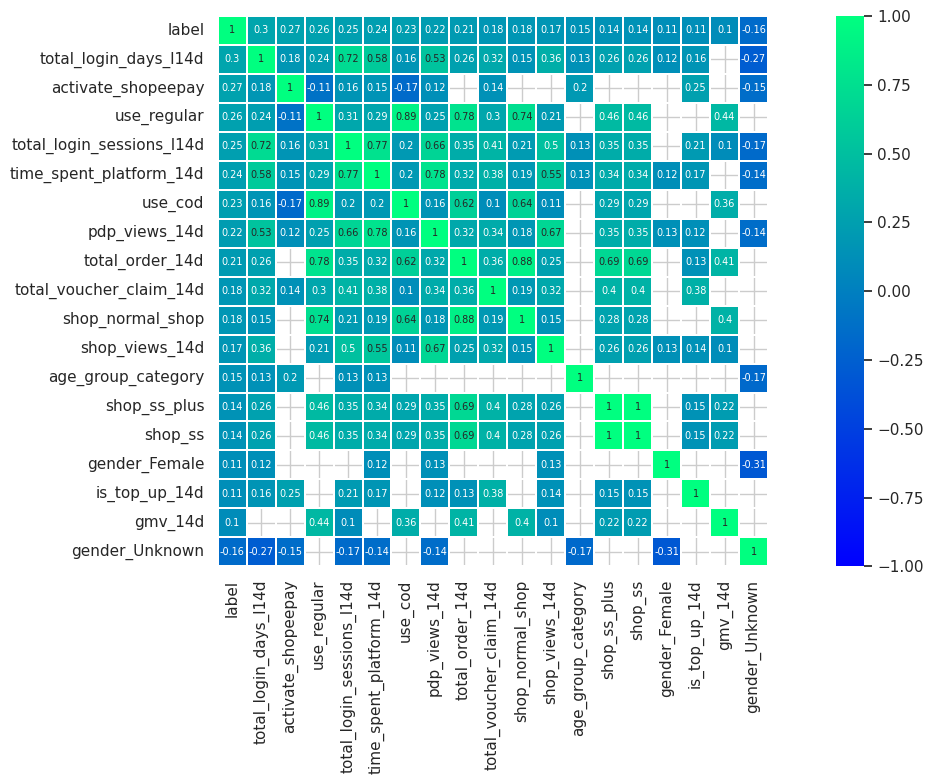

In [102]:
corr = best_feature_df.corr()
paper = plt.figure(figsize=(14,8))
sns.heatmap(corr[(corr>=0.1) | (corr<= -0.1)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True)

plt.show()

In [103]:
df_preprocess_importance = best_feature_df.copy()

In [ ]:
df_preprocess_importance

## 5. Data Modeling


---



In [234]:
df_model = df_preprocess.copy()

### Train and Test Data Preparation

In [235]:
df_model.label.value_counts()

label
0    121895
1    100483
Name: count, dtype: int64

In [236]:
X = df_model.drop('label', axis=1)
y = df_model['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set label counts:")
print(y_train.value_counts())

print("\nTest set label counts:")
print(y_test.value_counts())


Training set label counts:
label
0    97516
1    80386
Name: count, dtype: int64

Test set label counts:
label
0    24379
1    20097
Name: count, dtype: int64


### Base Model Training

In [237]:
import os

MODEL_PATH = './model/'
os.makedirs(MODEL_PATH, exist_ok=True)

#### Random Forest

In [238]:
rf_clf = RandomForestClassifier(random_state=42
                                0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [239]:
rf_pred = rf_clf.predict(X_test)
joblib.dump(rf_clf, os.path.join(MODEL_PATH, 'rf.pkl'))

['./model/rf.pkl']

#### XGBoost

In [240]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [241]:
xgb_pred = xgb_clf.predict(X_test)
joblib.dump(xgb_clf, os.path.join(MODEL_PATH, 'xgb.pkl'))

['./model/xgb.pkl']

#### LightGBM

In [242]:
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 80386, number of negative: 97516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2420
[LightGBM] [Info] Number of data points in the train set: 177902, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451856 -> initscore=-0.193176
[LightGBM] [Info] Start training from score -0.193176


LGBMClassifier(random_state=42)

In [243]:
lgbm_pred = lgbm_clf.predict(X_test)
joblib.dump(lgbm_clf, os.path.join(MODEL_PATH, 'lgbm.pkl'))


['./model/lgbm.pkl']

#### CatBoost

In [244]:
cb_clf = CatBoostClassifier(random_seed=42, verbose=0)
cb_clf.fit(X_train, y_train)

In [245]:
cb_pred = cb_clf.predict(X_test)
joblib.dump(cb_clf, os.path.join(MODEL_PATH, 'cb.pkl'))


['./model/cb.pkl']

## 6. Model Evaluation


---



### Evaluation Metric Selection

For this case, precision is generally more important. Here’s why:

- Campaign Assessment: 
The primary goal is to determine which campaigns attract high-quality, retained buyers. A false positive—where a buyer is predicted to be retained (high-quality) but then churns—would lead you to overestimate the effectiveness of a campaign. High precision ensures that when your model predicts a buyer will be retained, that prediction is highly reliable.

- Business Impact: 
When using the model’s predictions to evaluate campaigns, you want to be confident that the retained buyers identified by the model are indeed retained. A high precision model minimizes the number of buyers mistakenly classified as retained, giving you a more accurate measure of a campaign's success.

- Avoiding Overestimation: 
While recall is also important (you want to catch as many true retained buyers as possible), emphasizing recall at the expense of precision could lead to a situation where too many buyers are predicted as retained even if they are not. This would dilute your insights about which campaigns truly bring in high-quality buyers.

### Model Comparison

In [246]:
def compute_basic_metrics(model, X_train, X_test, y_train, y_test):
    # Fit model and compute predictions/probabilities
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test  = model.predict_proba(X_test)[:, 1]
    
    # Compute confusion matrix on test set
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Compute metrics for train and test sets
    metrics = {
        "train": {
            "precision": precision_score(y_train, y_pred_train),
            "recall":    recall_score(y_train, y_pred_train),
            "f1":        f1_score(y_train, y_pred_train),
            "roc_auc":   roc_auc_score(y_train, y_proba_train)
        },
        "test": {
            "precision": precision_score(y_test, y_pred_test),
            "recall":    recall_score(y_test, y_pred_test),
            "f1":        f1_score(y_test, y_pred_test),
            "roc_auc":   roc_auc_score(y_test, y_proba_test)
        }
    }
    
    return y_pred_train, y_pred_test, y_proba_train, y_proba_test, cm_test, metrics

In [247]:
def compute_cv_metrics(model, X_train, y_train, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scoring = {"precision": "precision", "recall": "recall", "roc_auc": "roc_auc"}
    cv_results = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv)
    
    cv_metrics = {
        "precision_mean": cv_results["test_precision"].mean(),
        "precision_std": cv_results["test_precision"].std(),
        "recall_mean": cv_results["test_recall"].mean(),
        "recall_std": cv_results["test_recall"].std(),
        "roc_auc_mean": cv_results["test_roc_auc"].mean(),
        "roc_auc_std": cv_results["test_roc_auc"].std()
    }
    return cv_metrics

In [ ]:
def plot_roc_curves(y_train, y_proba_train, y_test, y_proba_test):
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    roc_auc_train = roc_auc_score(y_train, y_proba_train)
    roc_auc_test  = roc_auc_score(y_test, y_proba_test)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {roc_auc_train:.2f})", color="blue")
    plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {roc_auc_test:.2f})", color="red")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [248]:
def eval_classification(model, X_train, X_test, y_train, y_test, n_splits=5):
    # Compute basic metrics on train and test sets
    y_pred_train, y_pred_test, y_proba_train, y_proba_test, cm_test, basic_metrics = compute_basic_metrics(model, X_train, X_test, y_train, y_test)
    
    # Compute cross-validation metrics on the training set
    cv_metrics = compute_cv_metrics(model, X_train, y_train, n_splits=n_splits)
    
    # Print confusion matrix and metrics
    print("Confusion Matrix (Test):")
    print(cm_test)
    
    print("\nTest Set Metrics:")
    print(f"  Precision: {basic_metrics['test']['precision']:.2f}")
    print(f"  Recall:    {basic_metrics['test']['recall']:.2f}")
    print(f"  F1-Score:  {basic_metrics['test']['f1']:.2f}")
    print(f"  ROC AUC:   {basic_metrics['test']['roc_auc']:.2f}")
    
    print("\nTraining Set Metrics:")
    print(f"  Precision: {basic_metrics['train']['precision']:.2f}")
    print(f"  Recall:    {basic_metrics['train']['recall']:.2f}")
    print(f"  F1-Score:  {basic_metrics['train']['f1']:.2f}")
    print(f"  ROC AUC:   {basic_metrics['train']['roc_auc']:.2f}")
    
    print("\nCross-Validation Metrics (Training Set):")
    print(f"  Precision: Mean = {cv_metrics['precision_mean']:.2f}, Std = {cv_metrics['precision_std']:.2f}")
    print(f"  Recall:    Mean = {cv_metrics['recall_mean']:.2f}, Std = {cv_metrics['recall_std']:.2f}")
    print(f"  ROC AUC:   Mean = {cv_metrics['roc_auc_mean']:.2f}, Std = {cv_metrics['roc_auc_std']:.2f}")
    
    # Plot ROC curves
    plot_roc_curves(y_train, y_proba_train, y_test, y_proba_test)
    
    # Return all metrics in a dictionary
    results = {
        "confusion_matrix_test": cm_test,
        "metrics": basic_metrics,
        "cv_metrics": cv_metrics
    }
    return results

Confusion Matrix (Test):
[[18627  5752]
 [ 6286 13811]]

Test Set Metrics:
  Precision: 0.71
  Recall:    0.69
  F1-Score:  0.70
  ROC AUC:   0.82

Training Set Metrics:
  Precision: 1.00
  Recall:    1.00
  F1-Score:  1.00
  ROC AUC:   1.00

Cross-Validation Metrics (Training Set):
  Precision: Mean = 0.71, Std = 0.00
  Recall:    Mean = 0.69, Std = 0.00
  ROC AUC:   Mean = 0.82, Std = 0.00


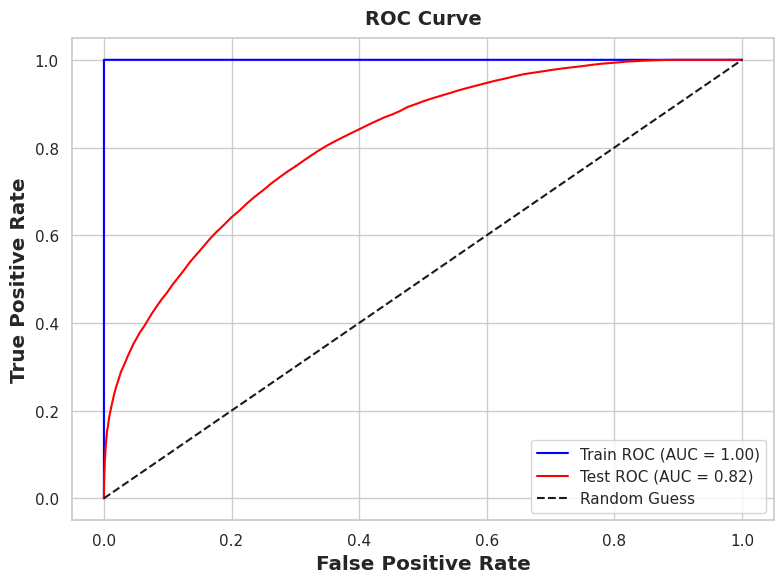

In [249]:
rf_eval = eval_classification(rf_clf, X_train, X_test, y_train, y_test)

Confusion Matrix (Test):
[[18687  5692]
 [ 5929 14168]]

Test Set Metrics:
  Precision: 0.71
  Recall:    0.70
  F1-Score:  0.71
  ROC AUC:   0.83

Training Set Metrics:
  Precision: 0.74
  Recall:    0.73
  F1-Score:  0.73
  ROC AUC:   0.85

Cross-Validation Metrics (Training Set):
  Precision: Mean = 0.71, Std = 0.00
  Recall:    Mean = 0.70, Std = 0.00
  ROC AUC:   Mean = 0.83, Std = 0.00


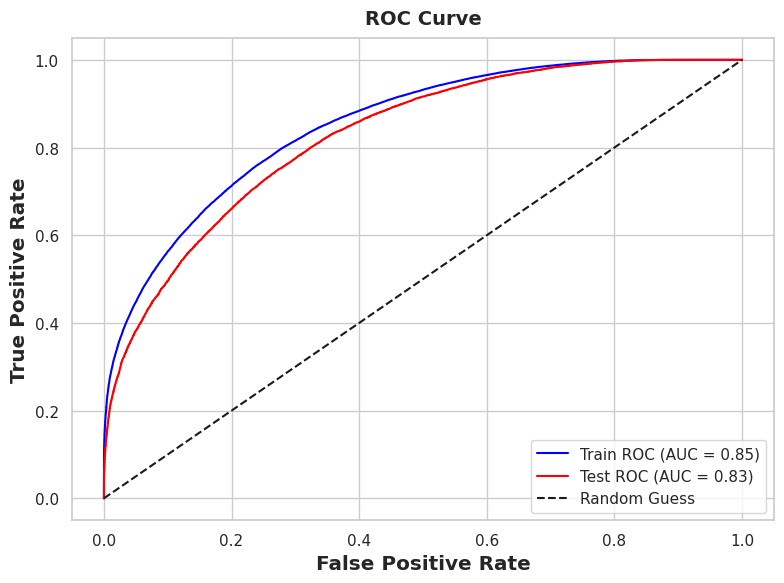

In [250]:
xgb_eval = eval_classification(xgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 80386, number of negative: 97516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2420
[LightGBM] [Info] Number of data points in the train set: 177902, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451856 -> initscore=-0.193176
[LightGBM] [Info] Start training from score -0.193176
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 64308, number of negative: 78013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_

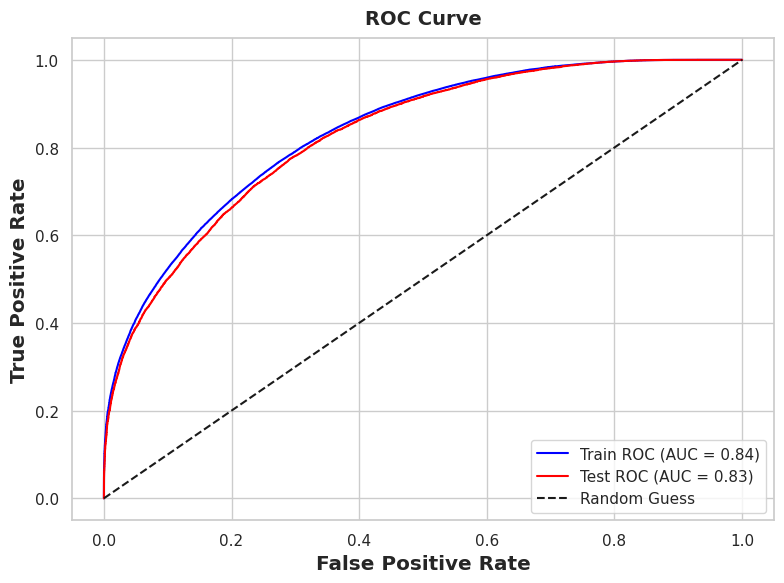

In [251]:
lgbm_eval = eval_classification(lgbm_clf, X_train, X_test, y_train, y_test)

Confusion Matrix (Test):
[[18668  5711]
 [ 5872 14225]]

Test Set Metrics:
  Precision: 0.71
  Recall:    0.71
  F1-Score:  0.71
  ROC AUC:   0.83

Training Set Metrics:
  Precision: 0.74
  Recall:    0.73
  F1-Score:  0.74
  ROC AUC:   0.85

Cross-Validation Metrics (Training Set):
  Precision: Mean = 0.72, Std = 0.00
  Recall:    Mean = 0.71, Std = 0.00
  ROC AUC:   Mean = 0.83, Std = 0.00


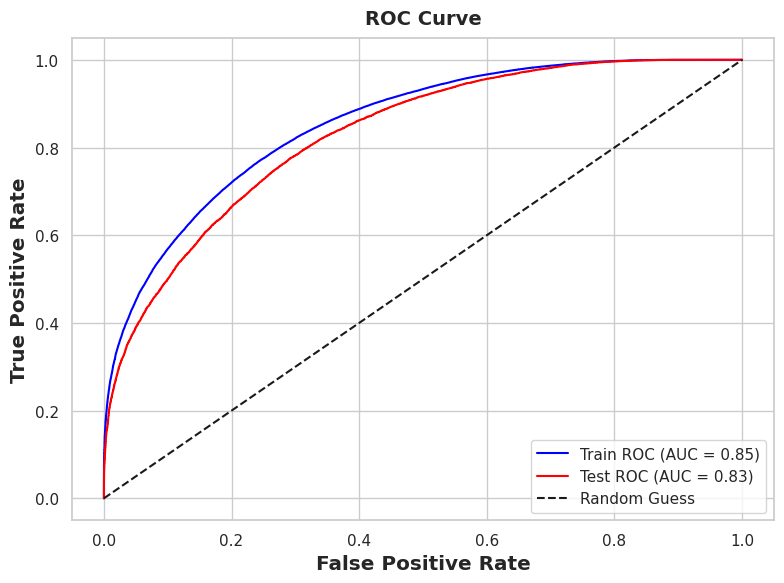

In [252]:
cb_eval = eval_classification(cb_clf, X_train, X_test, y_train, y_test)

In [253]:
def compare_model_evaluations(model_evals, sort_by="Test Precision", ascending=False):
    eval_results = []
    for model_name, eval_dict in model_evals:
        row = {
            "Model": model_name,
            "Test Precision": eval_dict["metrics"]["test"]["precision"],
            "Test Recall": eval_dict["metrics"]["test"]["recall"],
            "Test F1": eval_dict["metrics"]["test"]["f1"],
            "Test ROC AUC": eval_dict["metrics"]["test"]["roc_auc"],
            "CV Precision Mean": eval_dict["cv_metrics"]["precision_mean"],
            "CV Precision Std": eval_dict["cv_metrics"]["precision_std"],
            "CV Recall Mean": eval_dict["cv_metrics"]["recall_mean"],
            "CV Recall Std": eval_dict["cv_metrics"]["recall_std"],
            "CV ROC AUC Mean": eval_dict["cv_metrics"]["roc_auc_mean"],
            "CV ROC AUC Std": eval_dict["cv_metrics"]["roc_auc_std"]
        }
        eval_results.append(row)
    
    df_eval = pd.DataFrame(eval_results)
    df_eval = df_eval.sort_values(by=sort_by, ascending=ascending)
    return df_eval

In [254]:
model_evals = [
    ("XGBoost", xgb_eval),
    ("LightGBM", lgbm_eval),
    ("RandomForest", rf_eval),
    ("CatBoost", cb_eval)
]

df_summary = compare_model_evaluations(model_evals, sort_by="Test Precision", ascending=False)
df_summary

Model  Test Precision  Test Recall  Test F1  Test ROC AUC  \
3      CatBoost           0.714        0.708    0.711         0.829   
0       XGBoost           0.713        0.705    0.709         0.827   
1      LightGBM           0.713        0.713    0.713         0.829   
2  RandomForest           0.706        0.687    0.696         0.816   

   CV Precision Mean  CV Precision Std  CV Recall Mean  CV Recall Std  \
3              0.716             0.003           0.707          0.004   
0              0.714             0.003           0.703          0.003   
1              0.714             0.003           0.710          0.003   
2              0.708             0.003           0.686          0.003   

   CV ROC AUC Mean  CV ROC AUC Std  
3            0.830           0.002  
0            0.827           0.002  
1            0.829           0.002  
2            0.816           0.002

### Model Selection

Selected Model = **CatBoost**

Reason:
1. **Slight Edge in Performance:** CatBoost achieves a marginally higher test precision (0.715) and the highest test ROC AUC (0.830) among the compared models.
2. **Stable Cross-Validation:** It demonstrates consistent performance with low standard deviations across cross-validation folds.
4. **Built-in Categorical Handling:** CatBoost natively manages categorical features, reducing the need for extensive preprocessing, a significant advantage in e-commerce applications.


## 7. Hyperparameter Tunning


---



### Using Proba Treshold

In [ ]:
def optimizing_precission(model, X_train, X_test, y_train, y_test, threshold_list):
    # Fit the model and compute predicted probabilities
    model.fit(X_train, y_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test  = model.predict_proba(X_test)[:, 1]
    
    results = []
    
    for t in threshold_list:
        y_pred_train = (y_proba_train >= t).astype(int)
        y_pred_test  = (y_proba_test  >= t).astype(int)
        
        train_precision = precision_score(y_train, y_pred_train)
        test_precision  = precision_score(y_test, y_pred_test)
        train_recall    = recall_score(y_train, y_pred_train)
        test_recall     = recall_score(y_test, y_pred_test)
        train_f1        = f1_score(y_train, y_pred_train)
        test_f1         = f1_score(y_test, y_pred_test)
        train_roc_auc   = roc_auc_score(y_train, y_proba_train)
        test_roc_auc    = roc_auc_score(y_test, y_proba_test)
        
        results.append({
            'threshold': t,
            'train_precision': train_precision,
            'test_precision': test_precision,
            'train_recall': train_recall,
            'test_recall': test_recall,
            'train_f1': train_f1,
            'test_f1': test_f1,
            'train_roc_auc': train_roc_auc,
            'test_roc_auc': test_roc_auc
        })
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='test_precision', ascending=False)
    return results_df

In [ ]:
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7]
results_df = optimizing_precission(cb_clf, X_train, X_test, y_train, y_test, thresholds)

In [ ]:
results_df

### Bayessian Optimization

In [255]:
def create_catboost_model(iterations, learning_rate, depth, l2_leaf_reg, rsm):
    model = CatBoostClassifier(
        iterations=int(iterations),
        learning_rate=learning_rate,
        depth=int(depth),
        l2_leaf_reg=l2_leaf_reg,
        rsm=rsm,
        random_seed=42,
        verbose=0
    )
    return model

In [256]:
def objective(iterations, learning_rate, depth, l2_leaf_reg, rsm):
    model = create_catboost_model(iterations, learning_rate, depth, l2_leaf_reg, rsm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    return precision

In [257]:
pbounds = {
    'iterations': (50, 500),
    'learning_rate': (0.01, 0.3),
    'depth': (3, 10),
    'l2_leaf_reg': (1, 10),
    'rsm': (0.5, 1)
}

optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2, random_state=42)
optimizer.maximize(init_points=5, n_iter=50)

|   iter    |  target   |   depth   | iterat... | l2_lea... | learni... |    rsm    |
-------------------------------------------------------------------------------------
| 1         | 0.714     | 5.622     | 477.8     | 7.588     | 0.1836    | 0.578     |
| 2         | 0.7119    | 4.092     | 76.14     | 8.796     | 0.1843    | 0.854     |
| 3         | 0.7134    | 3.144     | 486.5     | 8.492     | 0.07158   | 0.5909    |
| 4         | 0.7145    | 4.284     | 186.9     | 5.723     | 0.1353    | 0.6456    |
| 5         | 0.712     | 7.283     | 112.8     | 3.629     | 0.1162    | 0.728     |
| 6         | 0.7144    | 5.992     | 214.3     | 8.22      | 0.1636    | 0.8422    |
| 7         | 0.7113    | 3.997     | 186.0     | 5.119     | 0.09632   | 0.856     |
| 8         | 0.715     | 5.575     | 477.8     | 7.424     | 0.1519    | 0.9841    |
| 9         | 0.7141    | 5.575     | 477.7     | 6.578     | 0.0877    | 0.6075    |
| 10        | 0.7129    | 5.491     | 477.5     | 7.0 

KeyboardInterrupt: 

#### Best Model Hyperparameter

In [170]:
best_params = optimizer.max['params']

print('Optimized hyperparameters:')
print(best_params)
print('Precission Score: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'depth': 7.814753525791521, 'iterations': 131.69733268505584, 'l2_leaf_reg': 2.4042401279090564, 'learning_rate': 0.07779487001335156, 'rsm': 0.6818760055880526}
F1 Score: 71.22%


#### Hyperparameter Evaluation

In [171]:
cb_tunned_clf = model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    learning_rate=best_params['learning_rate'],
    depth=int(best_params['depth']),
    l2_leaf_reg=best_params['l2_leaf_reg'],
    rsm=best_params['rsm'],
    random_seed=42,
    verbose=0
)
cb_tunned_clf.fit(X_train, y_train)

Learning rate set to 0.094137
0:	learn: 0.6598212	total: 41.7ms	remaining: 41.6s
1:	learn: 0.6357484	total: 77.5ms	remaining: 38.6s
2:	learn: 0.6129683	total: 109ms	remaining: 36.2s
3:	learn: 0.5957239	total: 134ms	remaining: 33.5s
4:	learn: 0.5831925	total: 161ms	remaining: 32s
5:	learn: 0.5730100	total: 194ms	remaining: 32.1s
6:	learn: 0.5647678	total: 226ms	remaining: 32s
7:	learn: 0.5573514	total: 253ms	remaining: 31.3s
8:	learn: 0.5510612	total: 279ms	remaining: 30.7s
9:	learn: 0.5455703	total: 304ms	remaining: 30.1s
10:	learn: 0.5414601	total: 334ms	remaining: 30s
11:	learn: 0.5374429	total: 355ms	remaining: 29.2s
12:	learn: 0.5341920	total: 379ms	remaining: 28.8s
13:	learn: 0.5314109	total: 405ms	remaining: 28.5s
14:	learn: 0.5292263	total: 434ms	remaining: 28.5s
15:	learn: 0.5264309	total: 457ms	remaining: 28.1s
16:	learn: 0.5249413	total: 482ms	remaining: 27.9s
17:	learn: 0.5230479	total: 505ms	remaining: 27.6s
18:	learn: 0.5216079	total: 529ms	remaining: 27.3s
19:	learn: 0.52

Learning rate set to 0.094137
0:	learn: 0.6598212	total: 28ms	remaining: 28s
1:	learn: 0.6357484	total: 59.5ms	remaining: 29.7s
2:	learn: 0.6129683	total: 90.2ms	remaining: 30s
3:	learn: 0.5957239	total: 118ms	remaining: 29.3s
4:	learn: 0.5831925	total: 147ms	remaining: 29.3s
5:	learn: 0.5730100	total: 183ms	remaining: 30.3s
6:	learn: 0.5647678	total: 216ms	remaining: 30.6s
7:	learn: 0.5573514	total: 248ms	remaining: 30.8s
8:	learn: 0.5510612	total: 296ms	remaining: 32.6s
9:	learn: 0.5455703	total: 328ms	remaining: 32.4s
10:	learn: 0.5414601	total: 366ms	remaining: 32.9s
11:	learn: 0.5374429	total: 406ms	remaining: 33.4s
12:	learn: 0.5341920	total: 450ms	remaining: 34.2s
13:	learn: 0.5314109	total: 492ms	remaining: 34.7s
14:	learn: 0.5292263	total: 526ms	remaining: 34.6s
15:	learn: 0.5264309	total: 566ms	remaining: 34.8s
16:	learn: 0.5249413	total: 607ms	remaining: 35.1s
17:	learn: 0.5230479	total: 640ms	remaining: 34.9s
18:	learn: 0.5216079	total: 678ms	remaining: 35s
19:	learn: 0.520

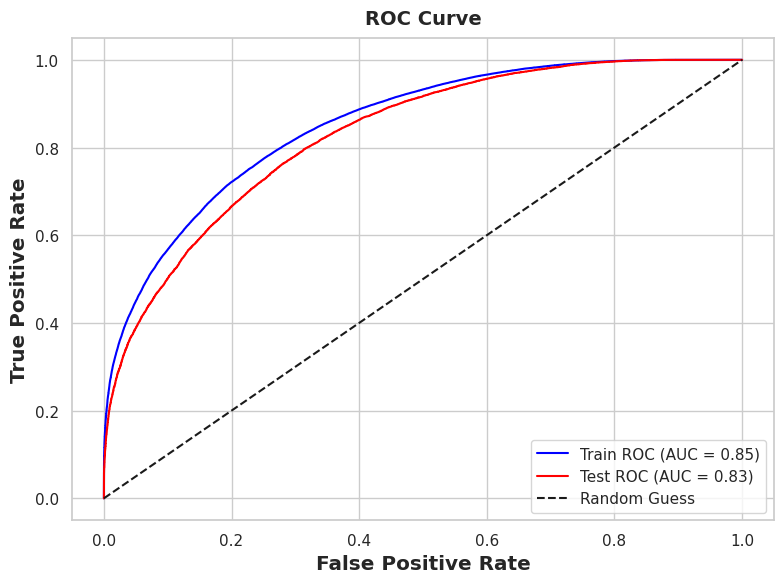

In [172]:
cb_tunned_eval = eval_classification(cb_tunned_clf, X_train, X_test, y_train, y_test)

In [173]:
model_evals = [
    ("CatBoost", cb_eval),
    ("CatBoost Tunned", cb_tunned_eval)
]

df_summary = compare_model_evaluations(model_evals, sort_by="Test Precision", ascending=False)
df_summary

Model  Test Precision  Test Recall  Test F1  Test ROC AUC  \
0         CatBoost           0.715        0.707    0.711         0.830   
1  CatBoost Tunned           0.715        0.707    0.711         0.830   

   CV Precision Mean  CV Precision Std  CV Recall Mean  CV Recall Std  \
0              0.716             0.003           0.706          0.004   
1              0.716             0.003           0.706          0.004   

   CV ROC AUC Mean  CV ROC AUC Std  
0            0.830           0.002  
1            0.830           0.002

#### Feature Importance

In [ ]:
explainer = shap.TreeExplainer(cb_tunned_eval)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=list(df_model.columns))

#### Error Analysis

#### Model Saving

## 8. Business Recommendation


---

